In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import struct
import sys
from array import array
import itertools
import os
from scipy import signal
from scipy.optimize import curve_fit
import subprocess
import shutil
from scipy.signal import find_peaks
import pandas as pd
pi = np.pi
clight = 299792458
E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
clight = 299792458

In [2]:
def func_exp_fit(x, a, b, c):
    return a*np.exp(b*x)+c

In [3]:
def get_folders(folders,cwd):
    new_folders = []
    for folder in folders:
        if os.path.isdir(os.path.join(cwd,folder)):
            print(folder)
            new_folders.append(folder)
    return new_folders

In [4]:
#os.chdir('/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/')
#working_folder = '/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/case19_7_map_2/'
#working_folder = '/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/case_studies/case19_8_1/'
#working_folder = '/media/dataHD/APES_sim_data/CBI/APES/case19_8/' # 18cav1cell case
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case1/'
#working_folder = '/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/case19_7_map_591_3rf_1cell/'
#working_folder = '/home/txin/Dropbox/code/Cpp/CBI_Iterative/bench/1RF/APES/case1/' # toy case
#working_folder = '/home/txin/Dropbox/code/Cpp/CBI_Iterative/bench/1RF/APES/case2/' # toy case2
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case11_scan_Ib_3_1macro/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case11_scan_Ib_fine_1macro/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case11_scan_Ib_fine'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case11_scan_Ib_'
#working_folder = '/home/txin/Dropbox/code/Cpp/APES_pack/APES8.4/bench/case_studies/case11_2.7A/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/case_studies/case12_2_3/case12_2_3/'
#working_folder = 'case19_7_2.5A_scan_gain/'
#working_folder = 'case19_7_2.5A_less_defocus/'
#working_folder = 'case19_7_2.5A_stablize_centroid_14400_gain//'
#working_folder = '5GeV/1cell_13F5D/'
#working_folder = '/media/dataHD/APES_sim_data/CBI/APES/case19_8' # 18cav1cell case
#working_folder = '5GeV/1cell_12F6D_gap_trad_25ms//'
#working_folder = '18GeV/1cell_18F/' # 
#working_folder = '10GeV/1cell_13F5D/' # 
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/5GeV/1cell_12F6D_gap_trad_35ms_nogain'
#working_folder = '../3rd/gain/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/Ib/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/QL/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/Vq3rd/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/Vq3rd_active//'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/Ek_damp_100_passive/'
#working_folder = '/media/dataHD/APES_sim_data/EIC/eSR/3rd/Ek_damp_10_passive/'
#working_folder = '/media/dataHD/APES_sim_data/NSLSII_OL/'
working_folder = 'CEPC/test_Z/'
home0 = os.getcwd()
home1 = os.path.join(home0,working_folder)
cwd = working_folder#os.path.join(home0,working_folder)

In [5]:
folders = os.listdir(cwd);
new_folders = get_folders(folders,cwd);
new_folders = np.sort(new_folders);


#get the starting index in the folder name string that represent the substring of current
i_start_current = new_folders[0].find('Idc')+3

#get the starting index in the folder name string that represent the substring of loading angle
i_start_thetaL = new_folders[0].find('ThetaL1')+6

#get the starting index in the folder name string that represent the sbustring of delay
i_start_delay = new_folders[0].find('delay')+5
##get the starting index in the folder name string that represent the sbustring of gain
i_start_gain = new_folders[0].find('gain')+4


current = [float(folder[folder.find('Idc')+3:folder.find('Idc')+3+4]) for folder in new_folders]
#thetaL = [float(folder[folder.find('ThetaL1_')+8:folder.find('ThetaL1_')+8+3]) for folder in new_folders]
#thetaL2 = [float(folder[folder.find('ThetaL2_')+8:folder.find('ThetaL2_')+8+3]) for folder in new_folders]
thetaL = [float(folder[folder.find('ThetaL')+6:folder.find('ThetaL')+6+3]) for folder in new_folders]

#delay = [float(folder[folder.find('delay')+5:folder.find('delay')+5+3]) for folder in new_folders]
#gain = [float(folder[folder.find('gain')+4:folder.find('gain')+4+3]) for folder in new_folders]
gain = [0]

0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree


In [6]:
inputfile = 'input.txt'
temppath = os.path.join(cwd,new_folders[0])
inputfile = os.path.join(temppath,inputfile)
tempinput = {}
with open(inputfile) as inputfile:
    for line in inputfile:
        if len(line.split())>1:
            tempinput[line.split()[0]] = line.split()[1:]
for i in tempinput:
    for j in range(len(tempinput[i])):
        tempinput[i][j] = float(tempinput[i][j])


In [7]:
nRF = int(tempinput['nRF'][0])
nRF1 = int(tempinput['nRF1'][0])
nRF2 = int(tempinput['nRF2'][0])
nRFc = int(tempinput['nRFc'][0])

E0Au = 196.9665687*931.5e6
E0Elec = 0.51099895000e6
nTurns = int(tempinput['n_turns'][0])
nDynamic = int(tempinput['n_dynamicOn'][0])
nfill = int(tempinput['n_fill'][0])
n_q_ramp = int(tempinput['n_q_ramp'][0])
NpRF = int(tempinput['N_bins'][0])
h = [int(i) for i in tempinput['h']]
detune_ini = np.array([i for i in tempinput['detune_ini']])
detune_final = np.array([i for i in tempinput['detune_final']])

step = int(tempinput['step_store'][0])
fill_step = int(tempinput['fill_step'][0])
nBeam = int(tempinput['nBeam'][0])
beam_shift = int(tempinput['beam_shift'][0])
nBunch = int(tempinput['n_bunches'][0])
nGap = h[0]/fill_step-nBunch
nPar = int(tempinput['Npar'][0])
NperBunch = int(tempinput['NperBunch'][0])
nTot = nBunch*nPar*nBeam
Gamma0 = tempinput['Gamma'][0]
Rring = tempinput['R'][0]
n_record = nTurns/step
clight = 299792458
beta = np.sqrt(1-1/Gamma0**2)
T0 = 2*np.pi*Rring/(clight*beta)
f0 = 1/T0
V0 = [i for i in tempinput['Vref_I']]
V0Q = [i for i in tempinput['Vref_Q']]
II = [i for i in tempinput['Iref_I']]
IQ = [i for i in tempinput['Iref_Q']]
mainRF = int(tempinput['mainRF'][0])
t_rad_long = tempinput['t_rad_long'][0]
if int(tempinput['type'][0]==2):
    atomicZ = 79
    Ek = Gamma0*E0Au
else:
    atomicZ =1
if int(tempinput['type'][0]==1):  
    Ek = Gamma0*E0Elec
    
GMTSQ = tempinput['GMTSQ'][0]
Ek_damp = tempinput['Ek_damp'][0]

eta = 1/GMTSQ-1/Gamma0**2
if nRF ==1:
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
elif nRF == 2 :
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))
    
elif nRF == 3 :
    Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1]+V0[2]*h[2]/h[0])*eta/(2*np.pi*Ek))
omega0 = f0*2*pi
omegarf = 2*np.pi*(np.array(h)*f0)
omegac = 2*np.pi*(np.array(h)*f0+detune_final)
Trf = 2*np.pi/omegarf
RoQ = [i for i in tempinput['RoQ']]
QL = [i for i in tempinput['QL']]
R = [RoQ[i]*QL[i] for i in range(nRF)]

Th = 2*np.pi/omegarf[0]
dthat =Th/NpRF

pattern = 'd'+'dd'*nBeam+3*nRF*'d'
n_stride = 1+2*nBeam+3*nRF
stride = len(pattern)*8
test = array('d')
bucket_height = 2*Qs/(h[mainRF]*eta)


print(Qs)
print(bucket_height)

0.028034421494909215
0.02329739094860687


In [8]:
thetaL1 = np.unique(thetaL)
IbDC = nBunch*f0*1.6e-19*NperBunch
f = f0*np.array(h)
Vbr = IbDC*2*np.array(RoQ)*np.array(QL)
Vc = np.sqrt(np.array(V0)**2+np.array(V0Q)**2)
Phis = np.arctan(np.array(V0)/np.abs(np.array(V0Q)))
tanpsi = -(Vbr/Vc*np.sin(Phis)+np.tan(np.array(thetaL1)/180*pi)*(1+Vbr/Vc*np.cos(Phis)))
#tanpsi = -(Vbr/Vc*np.sin(Phis)+np.tan(np.array(thetaL)/180*pi)*(1+Vbr/Vc*np.cos(Phis)))
df = tanpsi/2/QL*f
df_opt = -(Vbr/Vc*np.sin(Phis))/2/QL*f
ddf = df-df_opt

In [9]:
ddf

array([0.])

In [10]:
df

array([-17856.03231053])

0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree


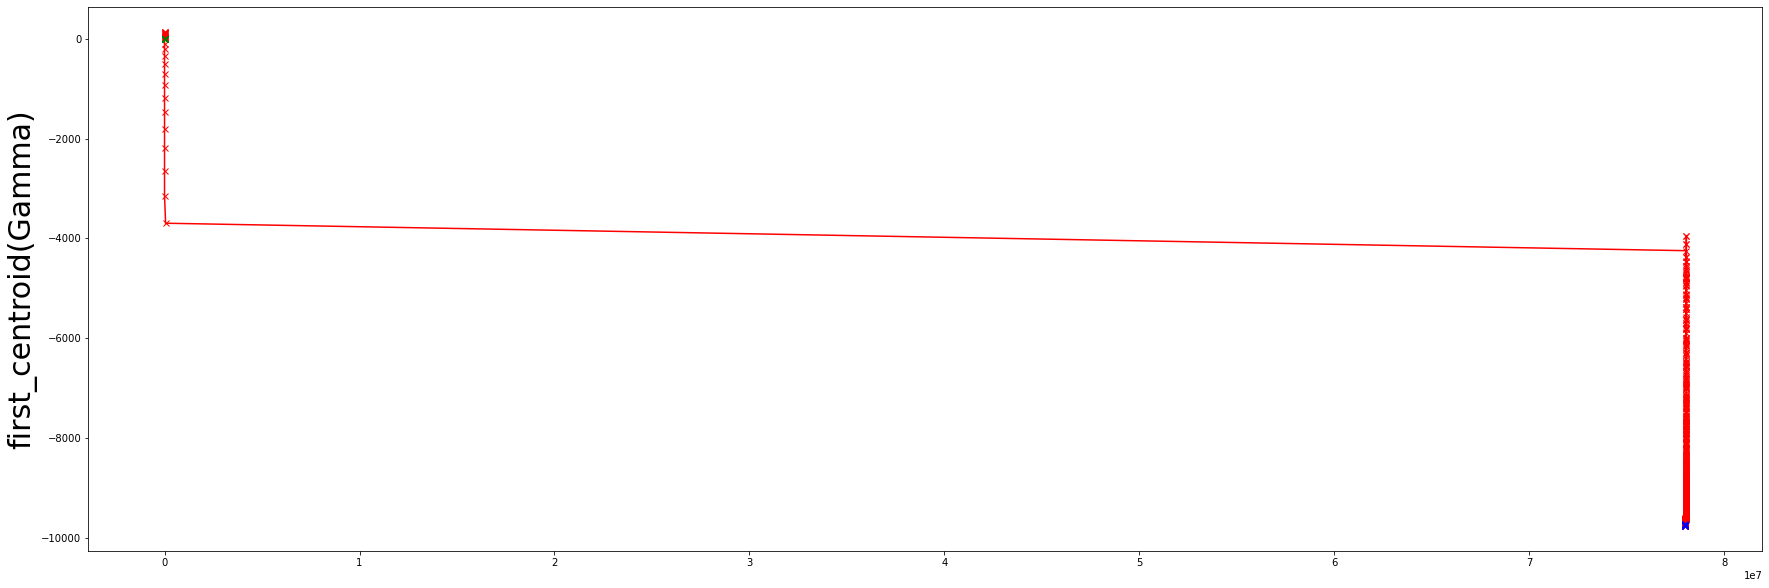

In [11]:
# plot first bunch centroid

inputfn = 'input.txt'
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1_0 = []
    M1_2_0 = []
    for i in range(nTurns):
        M1_1_0.append(M1_all[i*nBunch*2])
        M1_2_0.append(M1_all[i*nBunch*2+nBunch]-Gamma0)
    turns = np.array([i for i in range(nTurns)])

    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 4000
    n_turn_disp = 1000#int(1/Qs)*7000
    rng1 = turns
    rng2 = rng1+n_turn_disp
    
    axes1.plot(np.array(M1_1_0[rng1:rng2])/T0*h[0]*360,np.array(M1_2_0[rng1:rng2]),'rx-')
    axes1.plot(np.array(M1_1_0[rng1:rng1+10])/T0*h[0]*360,np.array(M1_2_0[rng1:rng1+10]),'gx-')
    axes1.plot(np.array(M1_1_0[rng2-10:rng2])/T0*h[0]*360,np.array(M1_2_0[rng2-10:rng2]),'bx-')
    #axes1.plot(np.array(M1_2_0[rng1:rng2]),'rx-')
    #axes1.axvline(x = 0)
    #axes1.axvline(x = 360)
    #axes1.axvline(x = 180)
    axes1.set_ylabel('first_centroid(Gamma)',fontsize=30)
    fn_after = os.path.join(cwd,'Centroids_first.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree


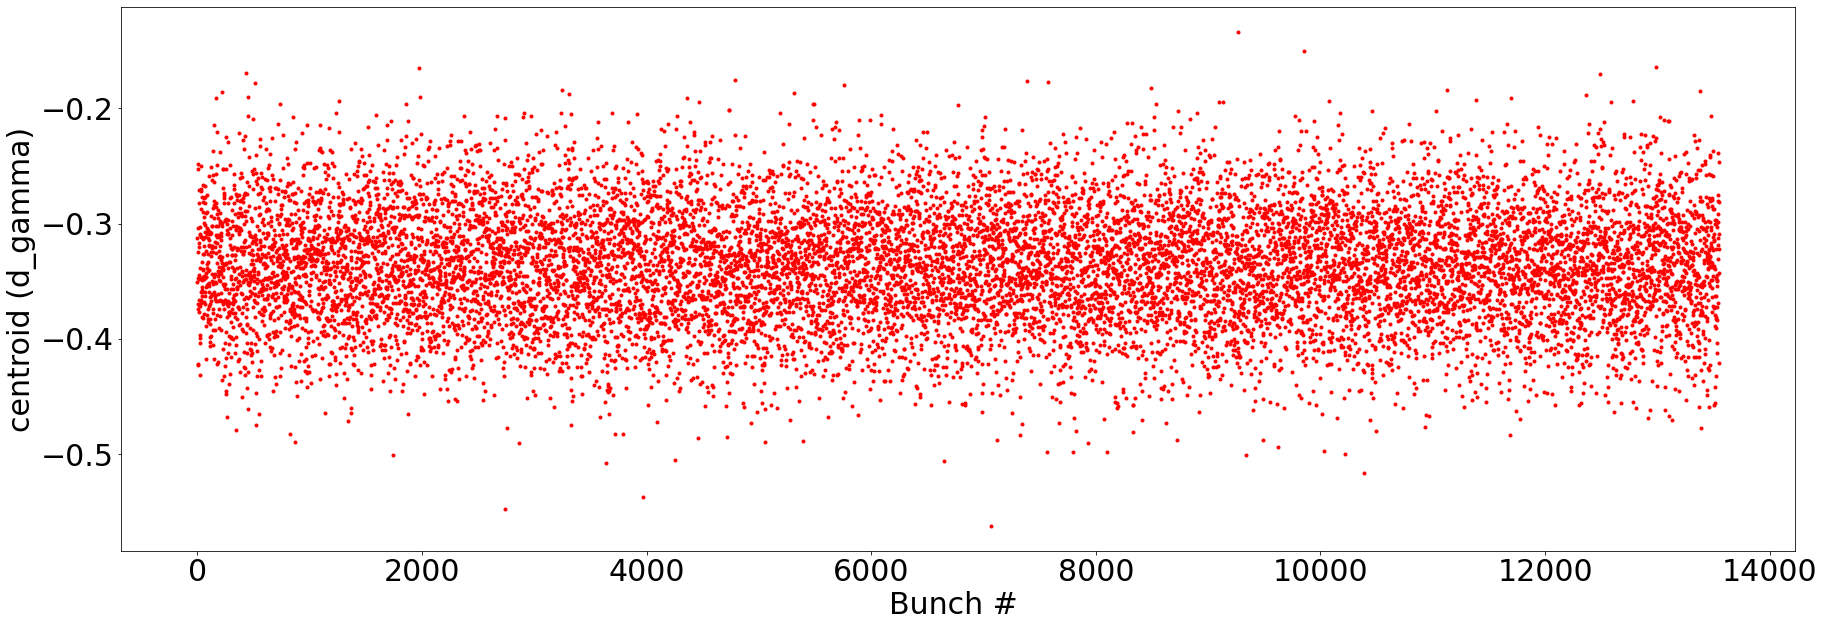

In [13]:
# Plot Centroids d_gamma
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]

inputfn = 'input.txt'
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])

    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 4000
    rng1 = turns*nBunch
    rng2 = rng1+nBunch*1
    
    axes1.plot((np.array(M1_2[rng1:rng2])),'r.')
    #axes1.axvline(x = nfill*nBunch)
    #axes1.axvline(x = (nfill+n_q_ramp)*nBunch)
    
    axes1.set_ylabel('centroid (d_gamma)',fontsize=30)
    axes1.set_xlabel('Bunch # ',fontsize=30)
    axes1.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'Centroids_gamma_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree
Tot data  203265000
rng2:  55694610


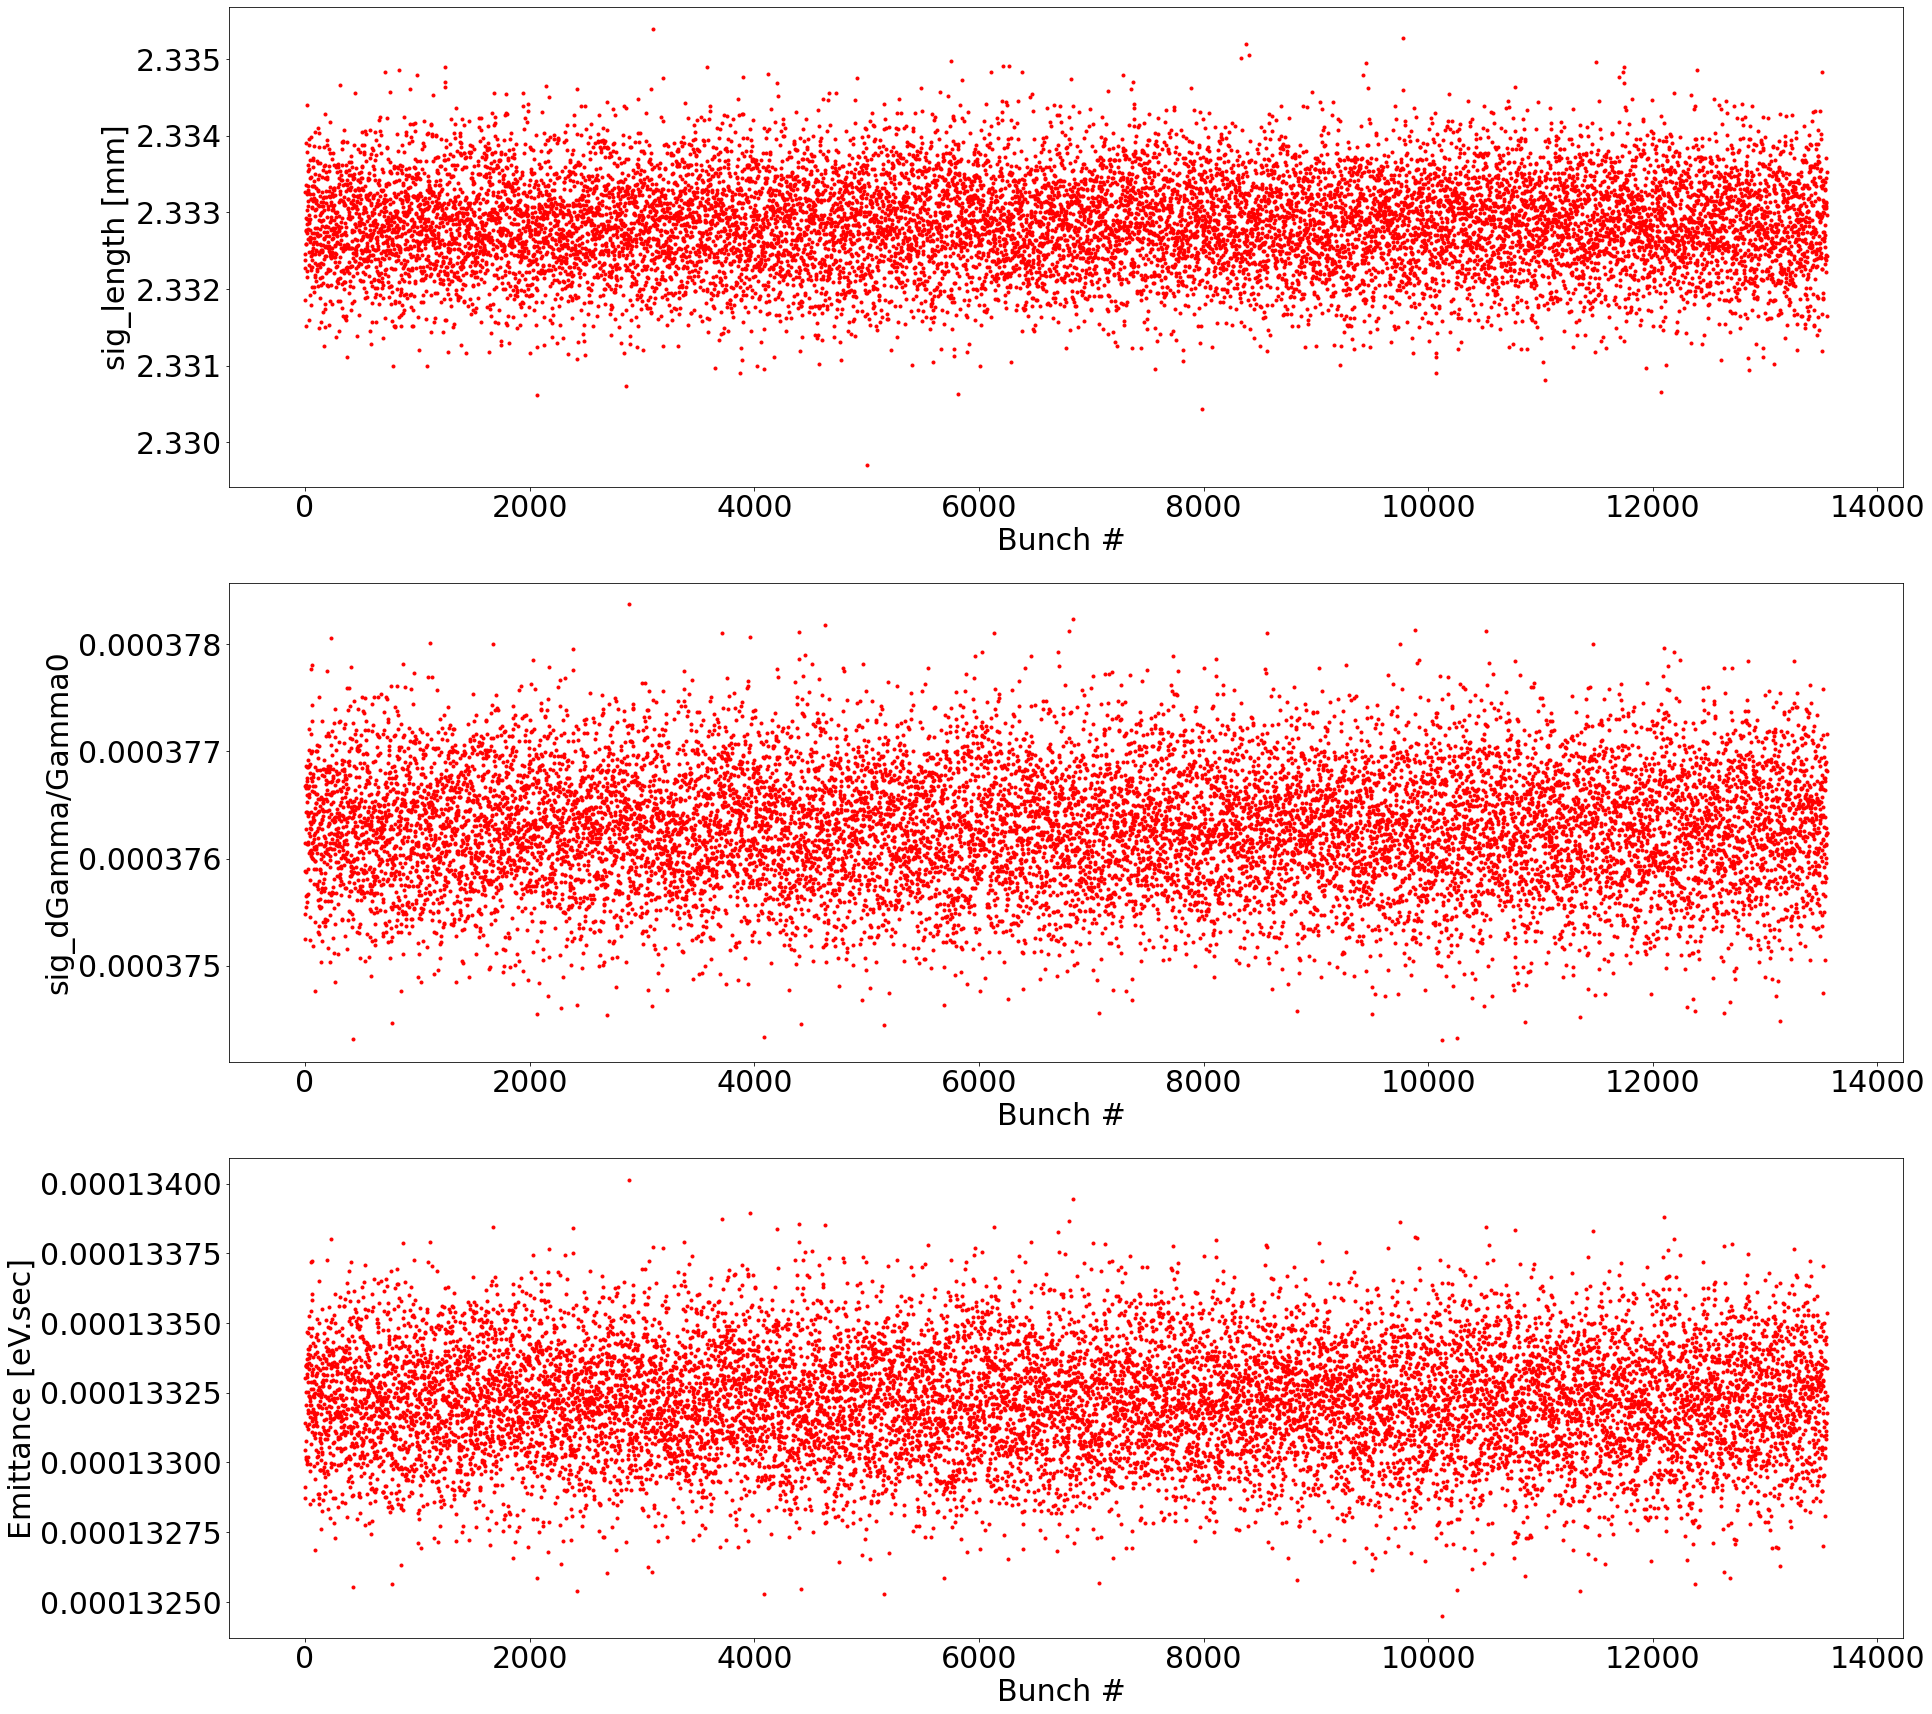

In [14]:
# Plot lengthes, delta_gamma and emittance
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]

for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M2_all = array('d')
    M2_fn = 'M2_all.bin'
    datafile = os.path.join(cwd,M2_fn)    
    print("Tot data ",3*nTurns*nBeam*nBunch)
    with open(datafile, mode='rb') as file: # b is important -> binary
        M2_all.fromfile(file,3*nTurns*nBeam*nBunch)
    M2_1 = []
    M2_2 = []
    M2_3 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M2_1.append(M2_all[i*nBunch*3+j])
            M2_2.append(M2_all[i*nBunch*3+nBunch+j])
            M2_3.append(M2_all[i*nBunch*3+nBunch*2+j])
    Emittance = np.sqrt(np.array(M2_1)*np.array(M2_2)-np.array(M2_3)**2)/Gamma0*Ek
    M2_1 = np.sqrt(np.array(M2_1))
    M2_2 = np.sqrt(np.array(M2_2))
    M2_3 = np.array(M2_3)
    
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    
    fig1,axes1 = plt.subplots(3,1)
    fig1.set_figheight(10*3)
    fig1.set_figwidth(30)
    
    turns = 4000
    rng1 = turns*nBunch
    rng2 = rng1+nBunch*1
    
    idx_stop = np.where(np.array(M2_1[:])*clight*1000>100)
    #print("first bad idx : ",idx_stop)
    if len(idx_stop[0])>0:
        rng2 = nBunch*int(idx_stop[0][0]/nBunch)
        print("rng2: ",rng2)
    else:
        print("2")
        #rng2 = rng1+nBunch*2000
        rng2 = rng1+nBunch*1
    rng2 = rng1+nBunch*1
    axes1[0].plot(np.array(M2_1[rng1:rng2])*clight*1000,'r.')
    #axes1[0].set_title("Plot at turn # "+str(turns),fontsize=30)
    axes1[0].set_ylabel('sig_length [mm]',fontsize=30)
    #axes1[0].set_xlabel('Bunch # x Turn #',fontsize=30)
    axes1[0].set_xlabel('Bunch # ',fontsize=30)
    axes1[0].tick_params(labelsize=30)
    
    axes1[1].plot(np.array(M2_2[rng1:rng2])/Gamma0,'r.')
    axes1[1].set_ylabel('sig_dGamma/Gamma0',fontsize=30)
    axes1[1].set_xlabel('Bunch # x Turn #',fontsize=30)
    axes1[1].set_xlabel('Bunch # ',fontsize=30)
    axes1[1].tick_params(labelsize=30)
    
    axes1[2].plot(Emittance[rng1:rng2],'r.')
    axes1[2].set_ylabel('Emittance [eV.sec]',fontsize=30)
    axes1[2].set_xlabel('Bunch # x Turn #',fontsize=30)
    axes1[2].set_xlabel('Bunch # ',fontsize=30)
    axes1[2].tick_params(labelsize=30)
    
    fn_after = os.path.join(cwd,'Logitudinal_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree
5000
4089 , 57.27499514100592
The turn number when amplitude reach  50 : 4089.0
[4.60199302e-07 2.08714365e-01 3.36413147e-01]
[[ 1.25503015e-13 -3.15559868e-09 -2.24164334e-08]
 [-3.15559868e-09  7.94024337e-05  5.50721718e-04]
 [-2.24164334e-08  5.50721718e-04  3.15287624e-02]]
5000
The turn number when amplitude reach  50 : 4999.0
[0.02106718 0.00565293 0.00052668]
[[ 2.65444230e-04 -1.30918512e-05 -1.88884829e-03]
 [-1.30918512e-05  6.49944596e-07  8.94756269e-05]
 [-1.88884829e-03  8.94756269e-05  2.45938277e-02]]
5000
The turn number when amplitude reach  50 : 4999.0
[0.02200098 0.00484545 0.00055002]
[[ 4.56465158e-05 -2.14255824e-06 -2.05224174e-04]
 [-2.14255824e-06  1.01368423e-07  9.26804990e-06]
 [-2.05224174e-04  9.26804990e-06  1.44102596e-03]]


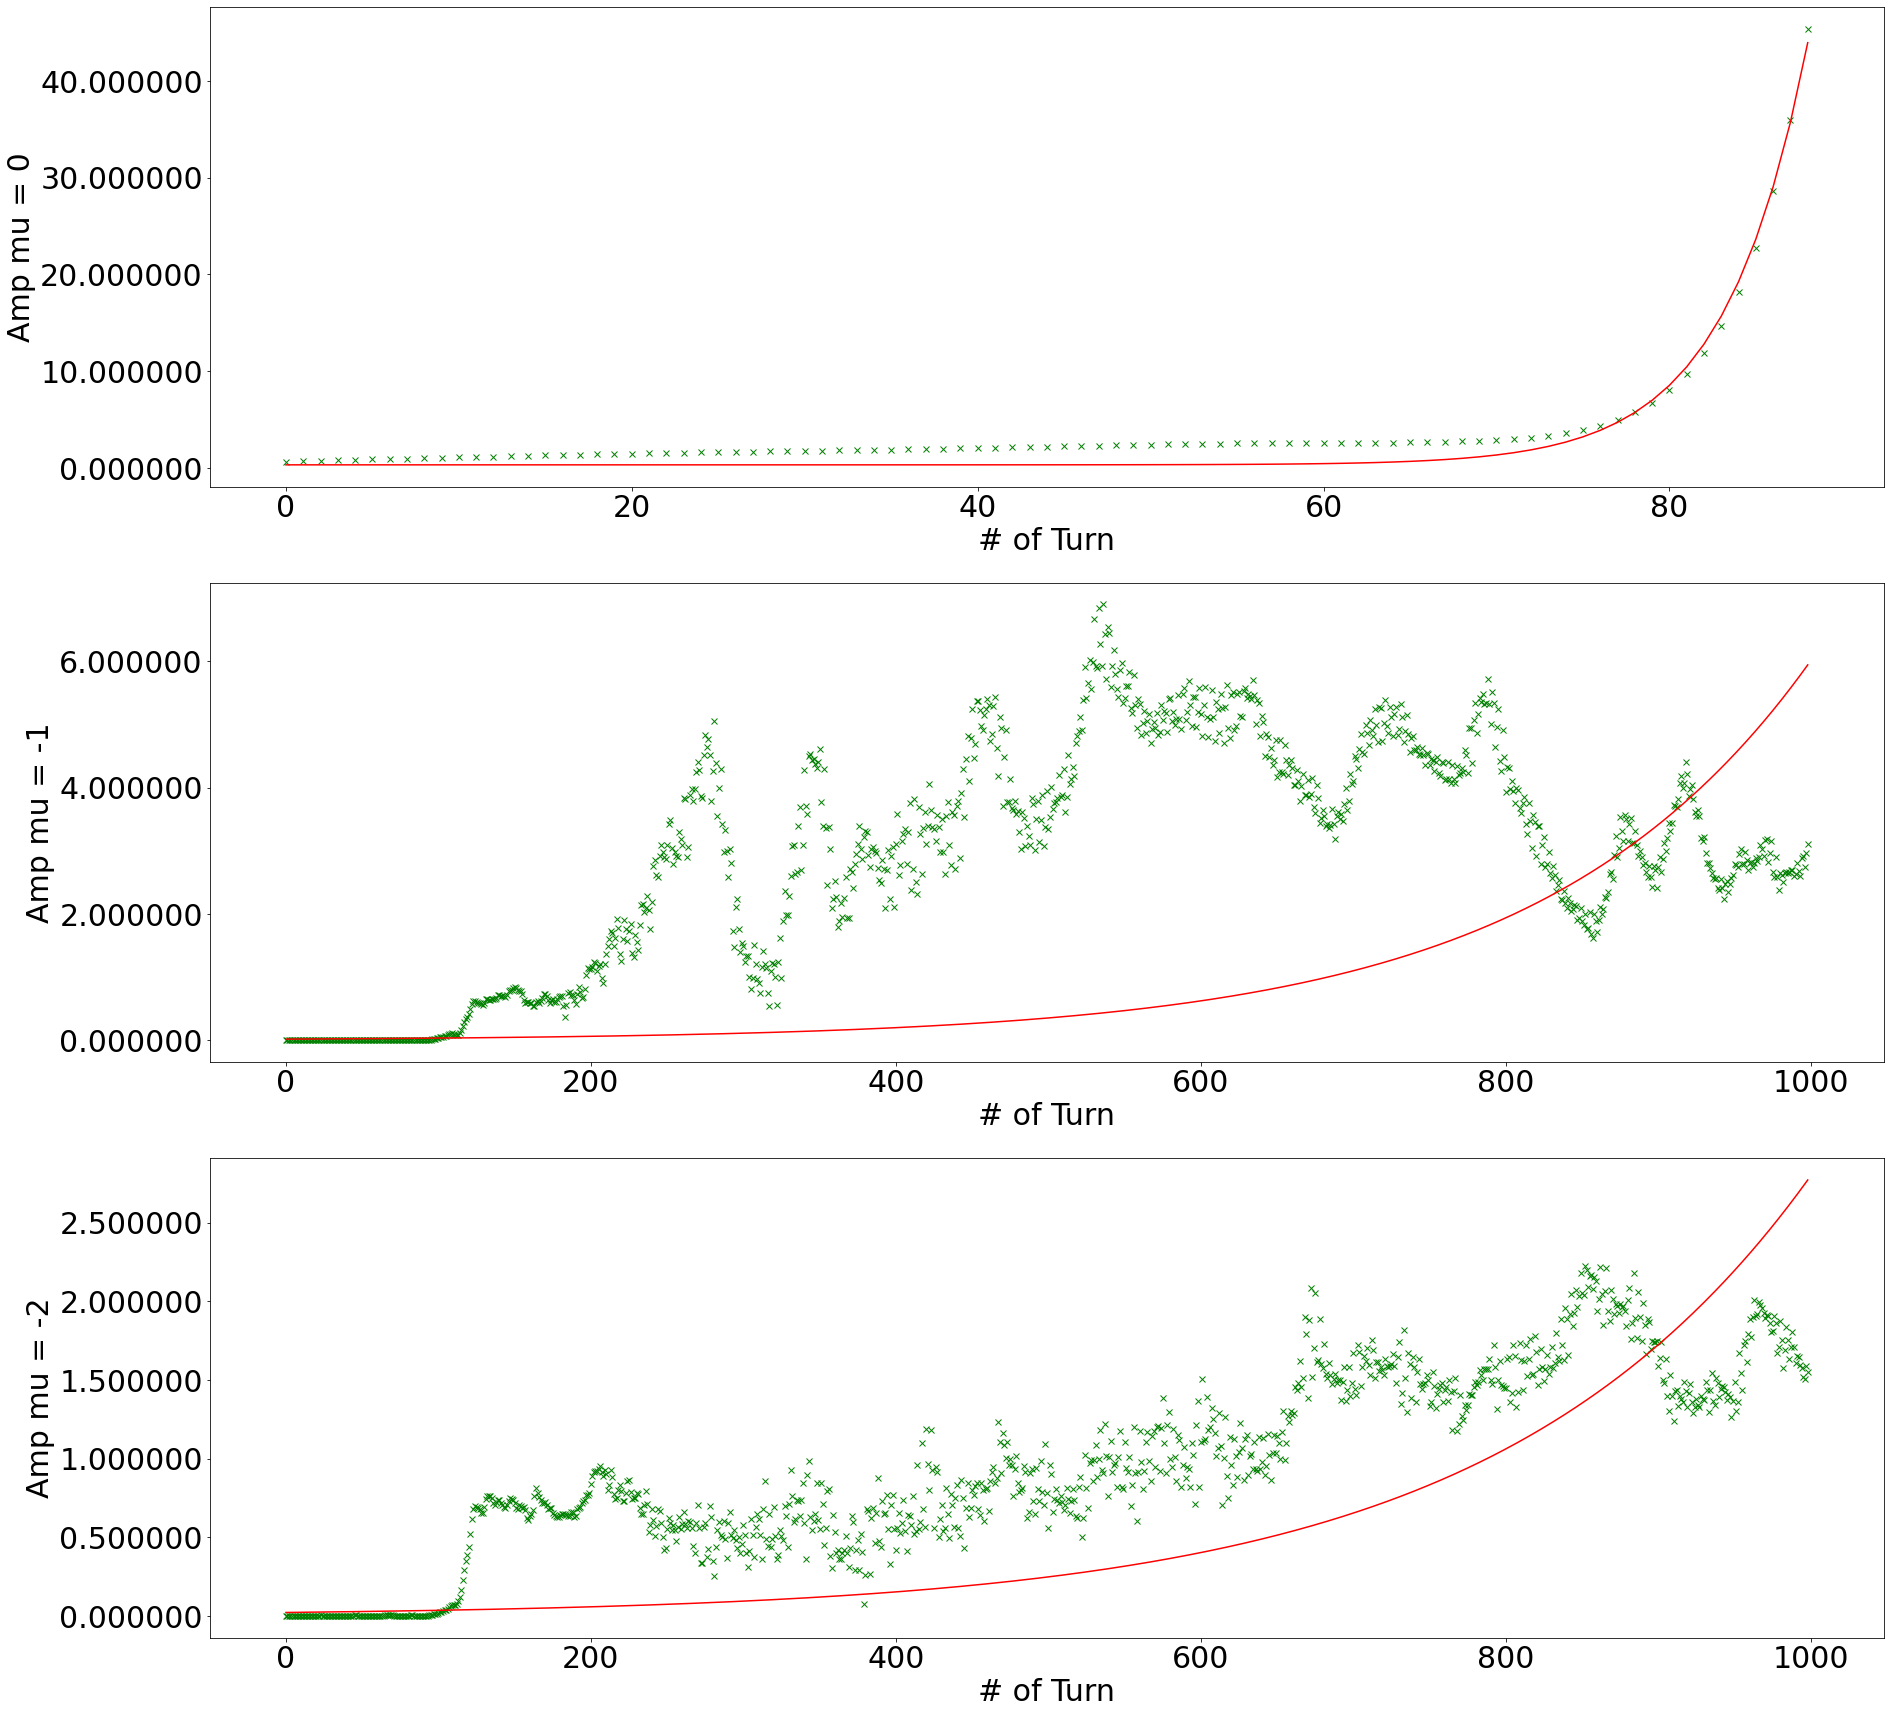

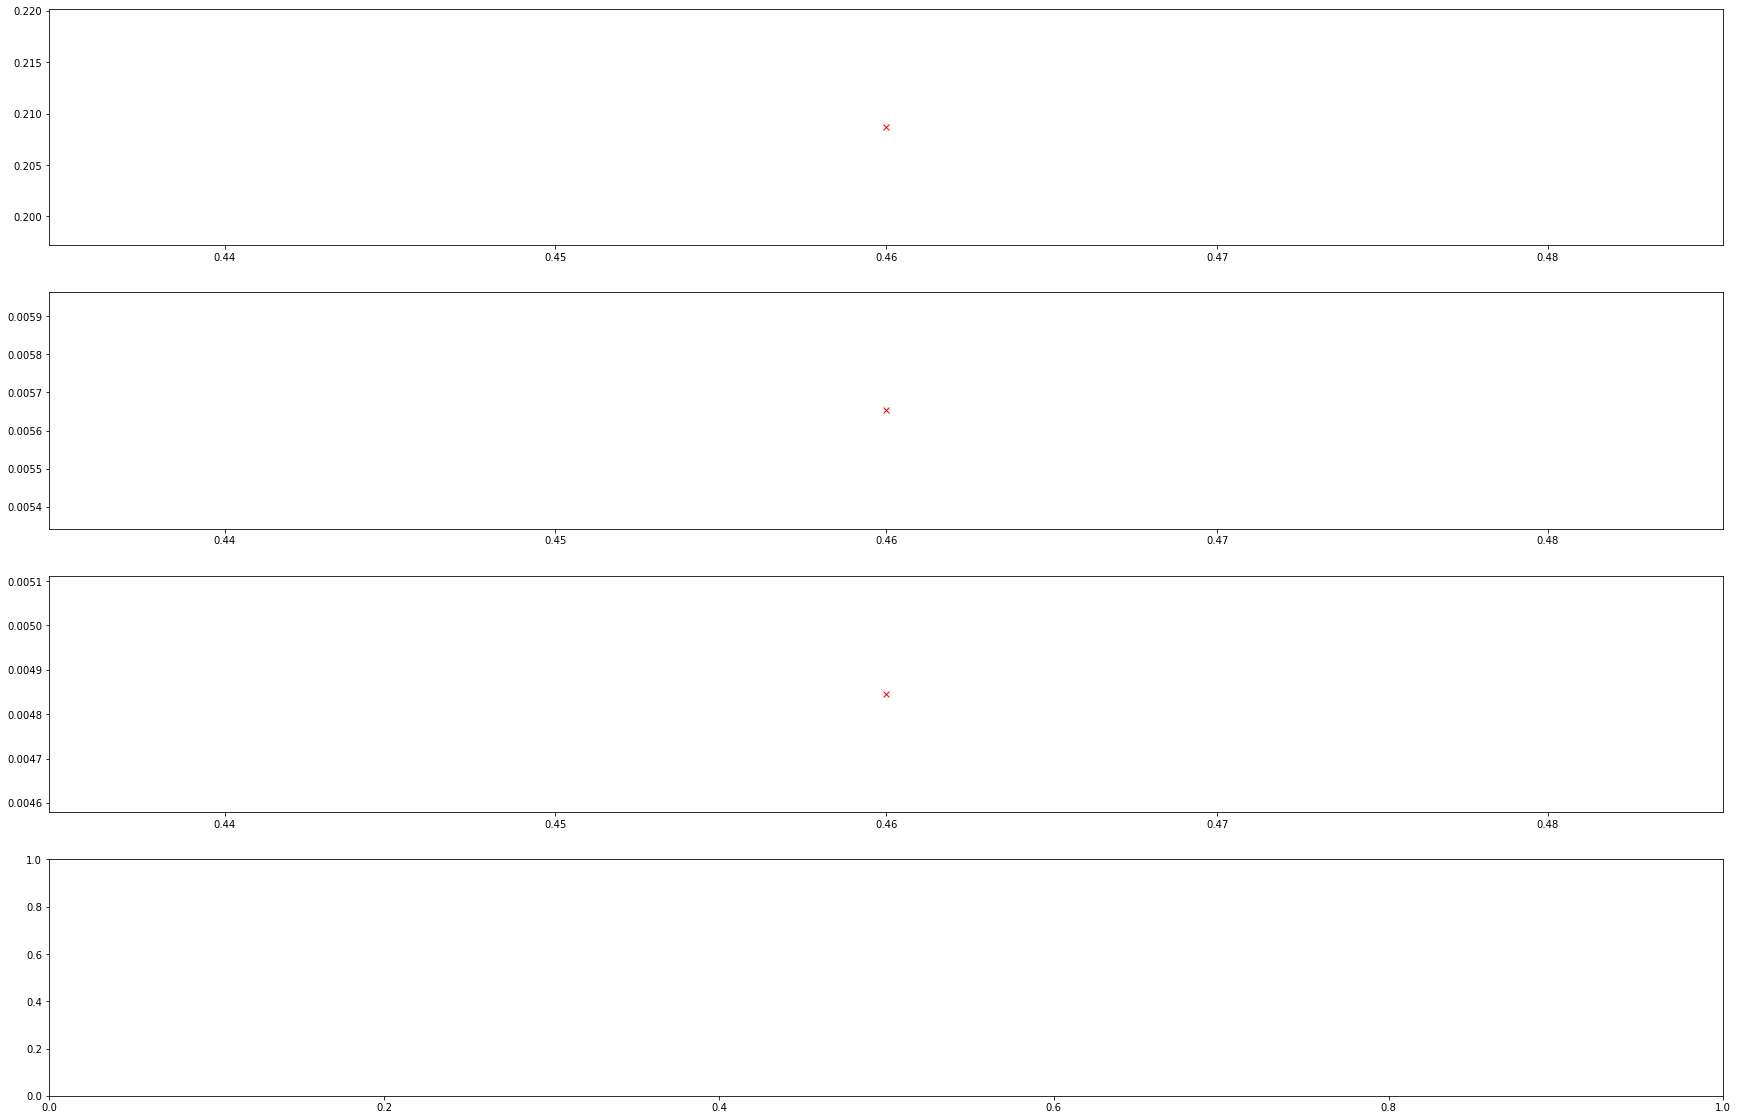

In [34]:
# get the fitted growth rate
# first, find the turn number where the mu=1 mode amplitude exceed certain value
def get_the_turn_number(c,value):
    print(len(c))
    for i in range(len(c)):
        if c[i]>=value:
            print(i,",",c[i])
            return i
    return i

inputfn = 'input.txt'
N_mode = 3 # number of mode to look
mu_danger = 0 # the mode we think is the most dangers
mus = np.array([i for i in range(N_mode)])
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]
qs = np.zeros(len(new_folders)) # to calculate the growth rate of mu=1
taus = np.zeros(len(new_folders)) # to calculate the growth rate of mu=1
qs = np.ndarray([N_mode,len(new_folders)])
taus = np.ndarray([N_mode,len(new_folders)])
centroids = np.array([(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)])
ids = np.array([i for i in range(nBunch)])

q_guess = 0.01
qidx = 0
N_samp_disp = 50
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    nRF = int(tempinput['nRF'][0])
    nRF1 = int(tempinput['nRF1'][0])
    nRF2 = int(tempinput['nRF2'][0])
    nRFc = int(tempinput['nRFc'][0])

    
    nTurns = int(tempinput['n_turns'][0])
    nfill = int(tempinput['n_fill'][0])
    n_q_ramp = int(tempinput['n_q_ramp'][0])
    NpRF = int(tempinput['N_bins'][0])
    h = [int(i) for i in tempinput['h']]
    detune_ini = np.array([i for i in tempinput['detune_ini']])
    detune_final = np.array([i for i in tempinput['detune_final']])

    step = int(tempinput['step_store'][0])
    fill_step = int(tempinput['fill_step'][0])
    nBeam = int(tempinput['nBeam'][0])
    beam_shift = int(tempinput['beam_shift'][0])
    nBunch = int(tempinput['n_bunches'][0])
    nPar = int(tempinput['Npar'][0])
    NperBunch = int(tempinput['NperBunch'][0])
    nTot = nBunch*nPar*nBeam
    Gamma0 = tempinput['Gamma'][0]
    Rring = tempinput['R'][0]
    n_record = nTurns/step
    beta = np.sqrt(1-1/Gamma0**2)
    T0 = 2*np.pi*Rring/(clight*beta)
    f0 = 1/T0
    V0 = [i for i in tempinput['Vref_I']]
    V0Q = [i for i in tempinput['Vref_Q']]
    II = [i for i in tempinput['Iref_I']]
    IQ = [i for i in tempinput['Iref_Q']]
    mainRF = int(tempinput['mainRF'][0])
    Pbeam = tempinput['Prad'][0]
    if int(tempinput['type'][0]==2):
        atomicZ = 79
        Ek = Gamma0*E0Au
    else:
        atomicZ =1
    if int(tempinput['type'][0]==1):  
        Ek = Gamma0*E0Elec

    GMTSQ = tempinput['GMTSQ'][0]
    Ek_damp = tempinput['Ek_damp'][0]

    eta = 1/GMTSQ-1/Gamma0**2
    if nRF ==1:
        Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
    elif nRF == 2 or nRF == 3:
        Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))

    omegarf = 2*np.pi*(np.array(h)*f0)
    omegac = 2*np.pi*(np.array(h)*f0+detune_final)
    Trf = 2*np.pi/omegarf
    RoQ = [i for i in tempinput['RoQ']]
    QL = [i for i in tempinput['QL']]
    R = [RoQ[i]*QL[i] for i in range(nRF)]

    Th = 2*np.pi/omegarf[0]
    dthat =Th/NpRF

    pattern = 'd'+'dd'*nBeam+3*nRF*'d'
    n_stride = 1+2*nBeam+3*nRF
    stride = len(pattern)*8
    test = array('d')
    bucket_height = 2*Qs/(h[mainRF]*eta)*Gamma0

    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1 = []
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_1.append(M1_all[i*nBunch*2+j])
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    for turn in range(nTurns):
        M1_1[turn*nBunch:(turn+1)*nBunch] = np.array(M1_1[turn*nBunch:(turn+1)*nBunch]-centroids)
# calculate the components
    sincomp = []
    coscomp = []
    a1 = np.ndarray([N_mode,nTurns])
    b1 = np.ndarray([N_mode,nTurns])
    a2 = np.ndarray([N_mode,nTurns])
    b2 = np.ndarray([N_mode,nTurns])
    
    c = np.ndarray([N_mode,nTurns])
    d = np.ndarray([N_mode,nTurns])
    e = np.ndarray([N_mode,nTurns])
    
    value = 50 # the value where we stop the plotting
    
    idx = np.zeros(N_mode)
    
    fig1,axes1 = plt.subplots(N_mode,1)
    fig1.set_figheight(10*(N_mode))
    fig1.set_figwidth(30)
    
    for mu in range(N_mode):
        #sincomp.append(np.sin((nBunch-mu)*2*pi*f0*np.array(centroids)))
        #coscomp.append(np.cos((nBunch-mu)*2*pi*f0*np.array(centroids)))
        sincomp.append(np.sin((nBunch-mu)*2*pi/nBunch*ids))
        coscomp.append(np.cos((nBunch-mu)*2*pi/nBunch*ids))
        for i in range(nTurns):
            a1[mu][i] = np.sum(sincomp[mu]*M1_2[i*nBunch:(i+1)*nBunch])/len(sincomp[mu])*2
            b1[mu][i] = np.sum(coscomp[mu]*M1_2[i*nBunch:(i+1)*nBunch])/len(coscomp[mu])*2
            a2[mu][i] = np.sum(sincomp[mu]*M1_1[i*nBunch:(i+1)*nBunch])/len(sincomp[mu])*2
            b2[mu][i] = np.sum(coscomp[mu]*M1_1[i*nBunch:(i+1)*nBunch])/len(coscomp[mu])*2
        c[mu] = np.sqrt(np.array(a1[mu])**2+np.array(b1[mu])**2) #gamma
        d[mu] = np.sqrt(np.array(a2[mu])**2+np.array(b2[mu])**2)*Gamma0/eta*Qs*2*pi/T0 #time
        e[mu] = np.sqrt(c[mu]**2+d[mu]**2)
        
        idx[mu] = get_the_turn_number(c[mu],value)
        print("The turn number when amplitude reach ",value,":",idx[mu])
        
        # fit the growth rate
        rng1 = nDynamic
        rng2 = int(idx[mu])
        if rng1>rng2:
            rng1 = 0
        if c[mu][rng2]<c[mu][0]:
            rng2 = nTurns
        #rng2 = rng1+7000
        cNew = c[mu][rng1:rng2]
        turn_temp = range(rng2-rng1)
        # the guessed value of growth rate
        if qidx<=len(thetaL)/2:
            q_guess = 1.8
        else:
            q_guess = 0.6
        popt, pcov = curve_fit(func_exp_fit, turn_temp, \
                               cNew,bounds=([-cNew[0]*20,-q_guess,-cNew[0]*0.5], [cNew[0]*20, q_guess, cNew[0]*0.5]),\
                               maxfev=200000000)
        print(popt)
        print(pcov)
        qs[mu][qidx] = popt[1]
        c_fit =  popt[0]*np.exp(popt[1]*turn_temp)+popt[2]
        axes1[mu].plot(c[mu][rng1:rng2],'gx')
        axes1[mu].plot(c_fit,'r-')
        axes1[mu].tick_params(labelsize=50)

        axes1[mu].set_xlabel('# of Turn',fontsize=30)
        axes1[mu].set_ylabel('Amp mu = '+str(-mu),fontsize=30)

        axes1[mu].tick_params(labelsize=30)
        y_labels = axes1[mu].get_yticks()
        axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.6f'))
    qidx+=1 # for each parameter sample point
    fn_after = os.path.join(cwd,'CB_Modes.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(20)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(current,qs[mu],'rx-')
plt.show()
os.chdir(home0)

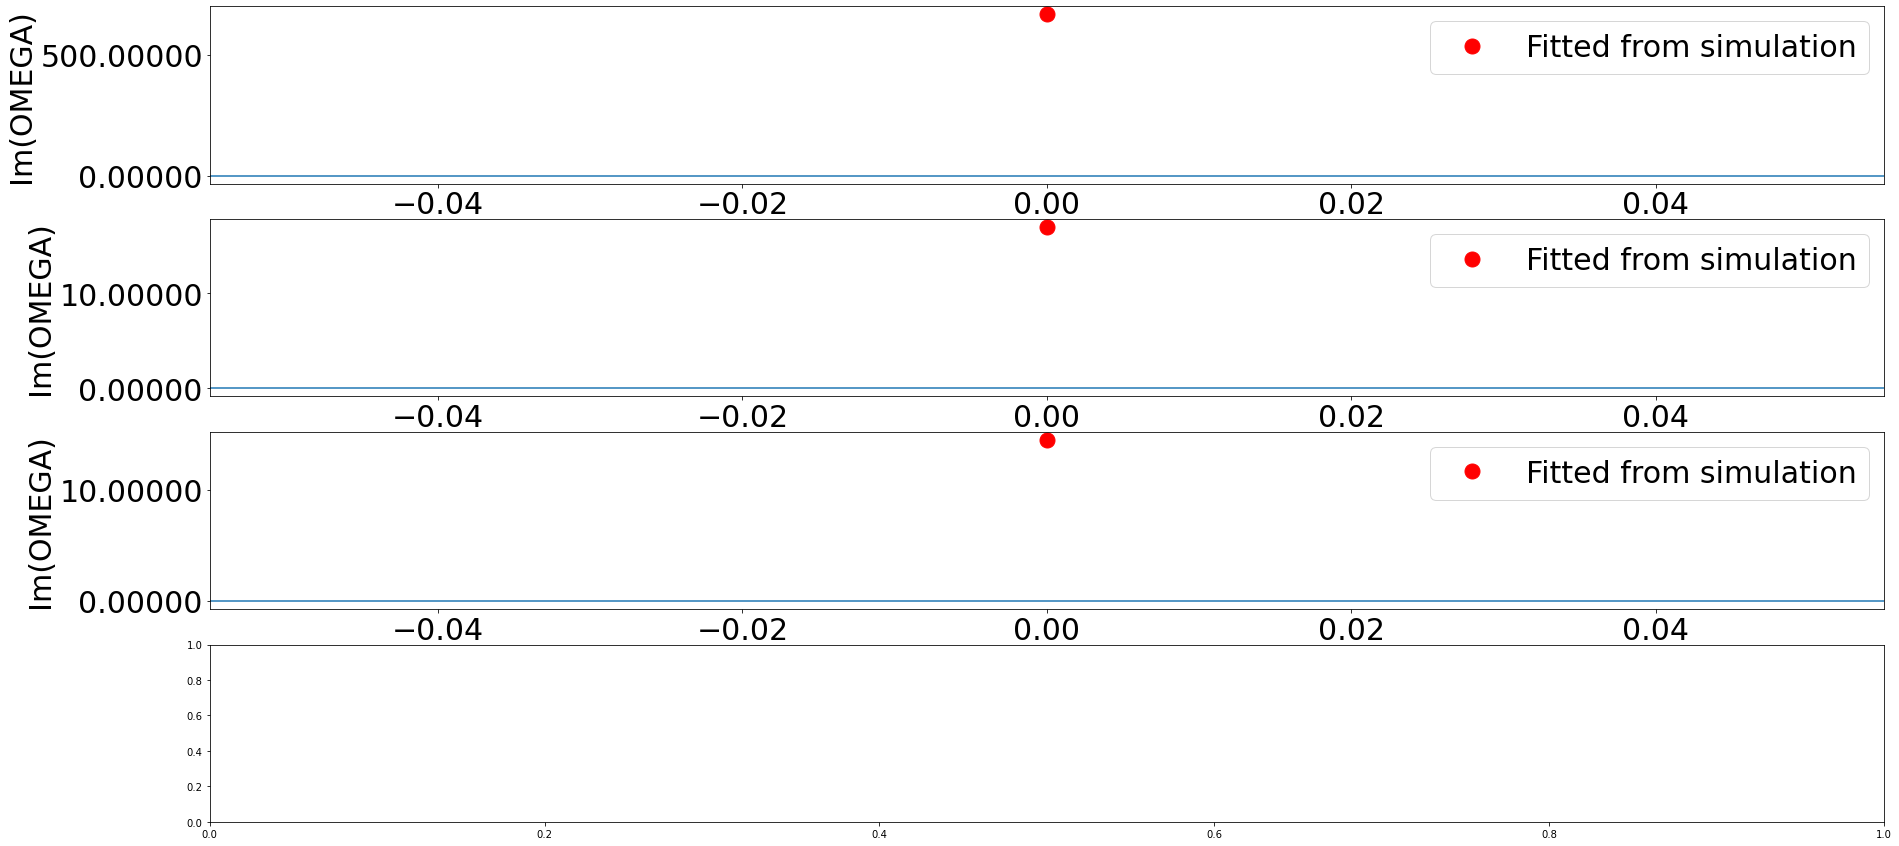

In [16]:
# Omega_Im = qs/T0 vs thetaL
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(thetaL[rng1:rng2],qs[mu][rng1:rng2]/T0,'r.', ms=30)
    axes1[mu].axhline(y=0)
    axes1[mu].set_ylabel('Im(OMEGA)',fontsize=30)
    axes1[mu].set_xlabel('ThetaL [degree]',fontsize=30)
    axes1[mu].legend(["Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

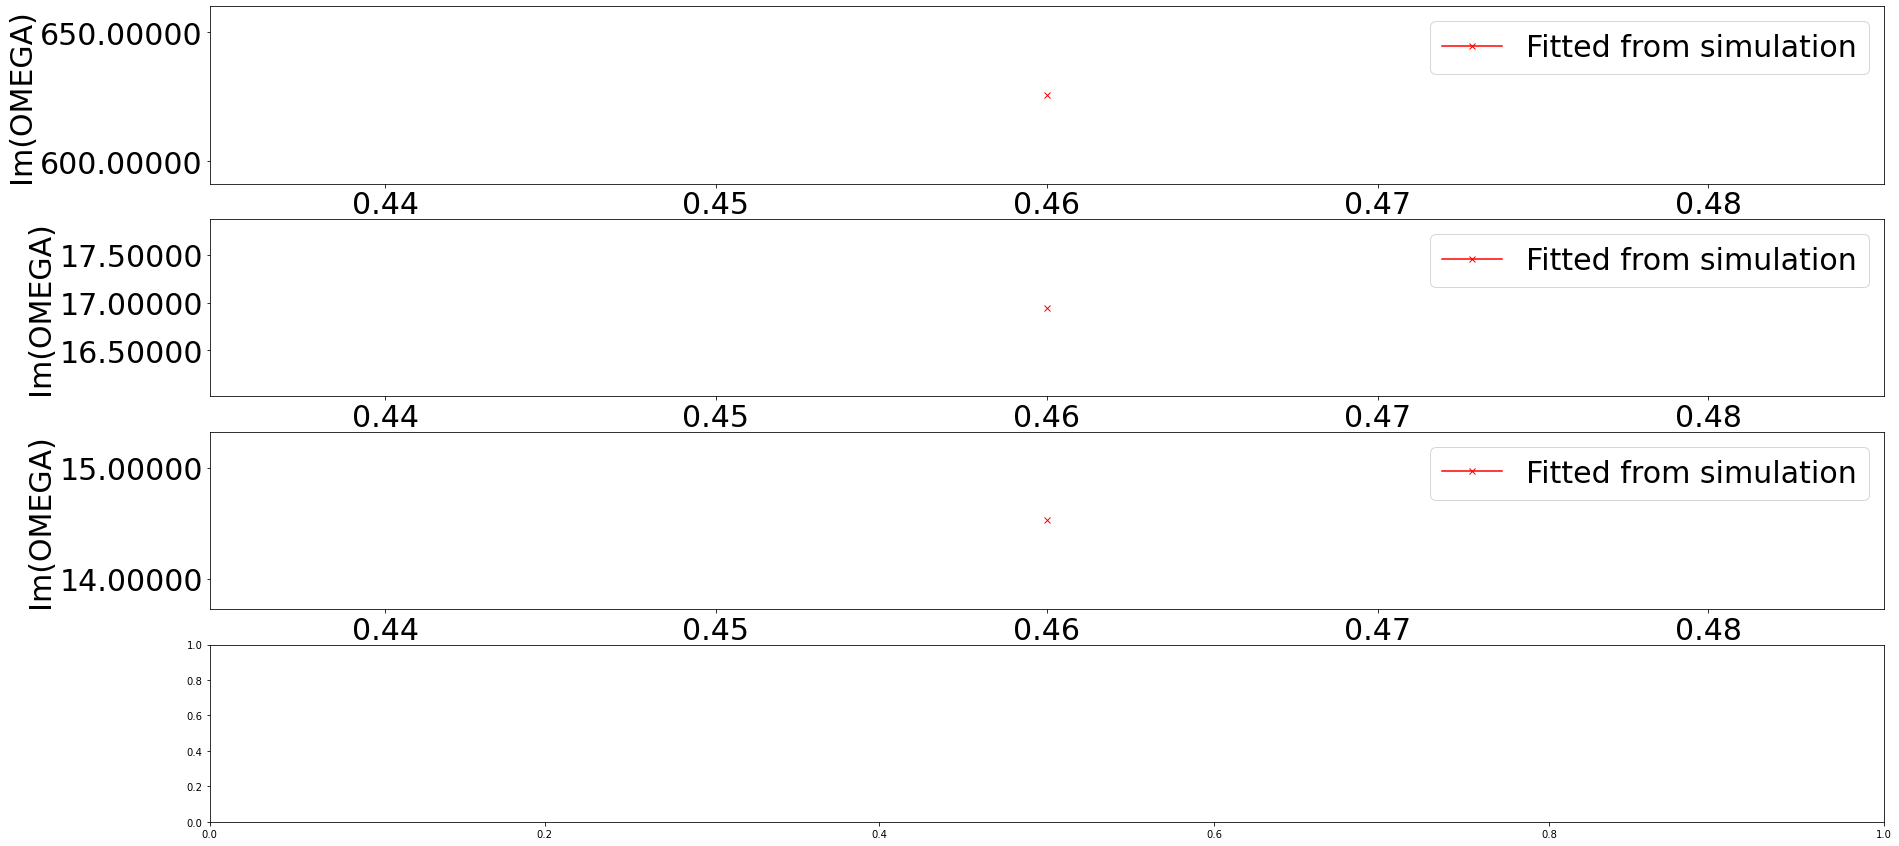

In [35]:
# Omega_Im = qs/T0 vs current
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)-1
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(current,qs[mu]/T0,'rx-')
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].set_ylabel('Im(OMEGA)',fontsize=30)
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].legend(["Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

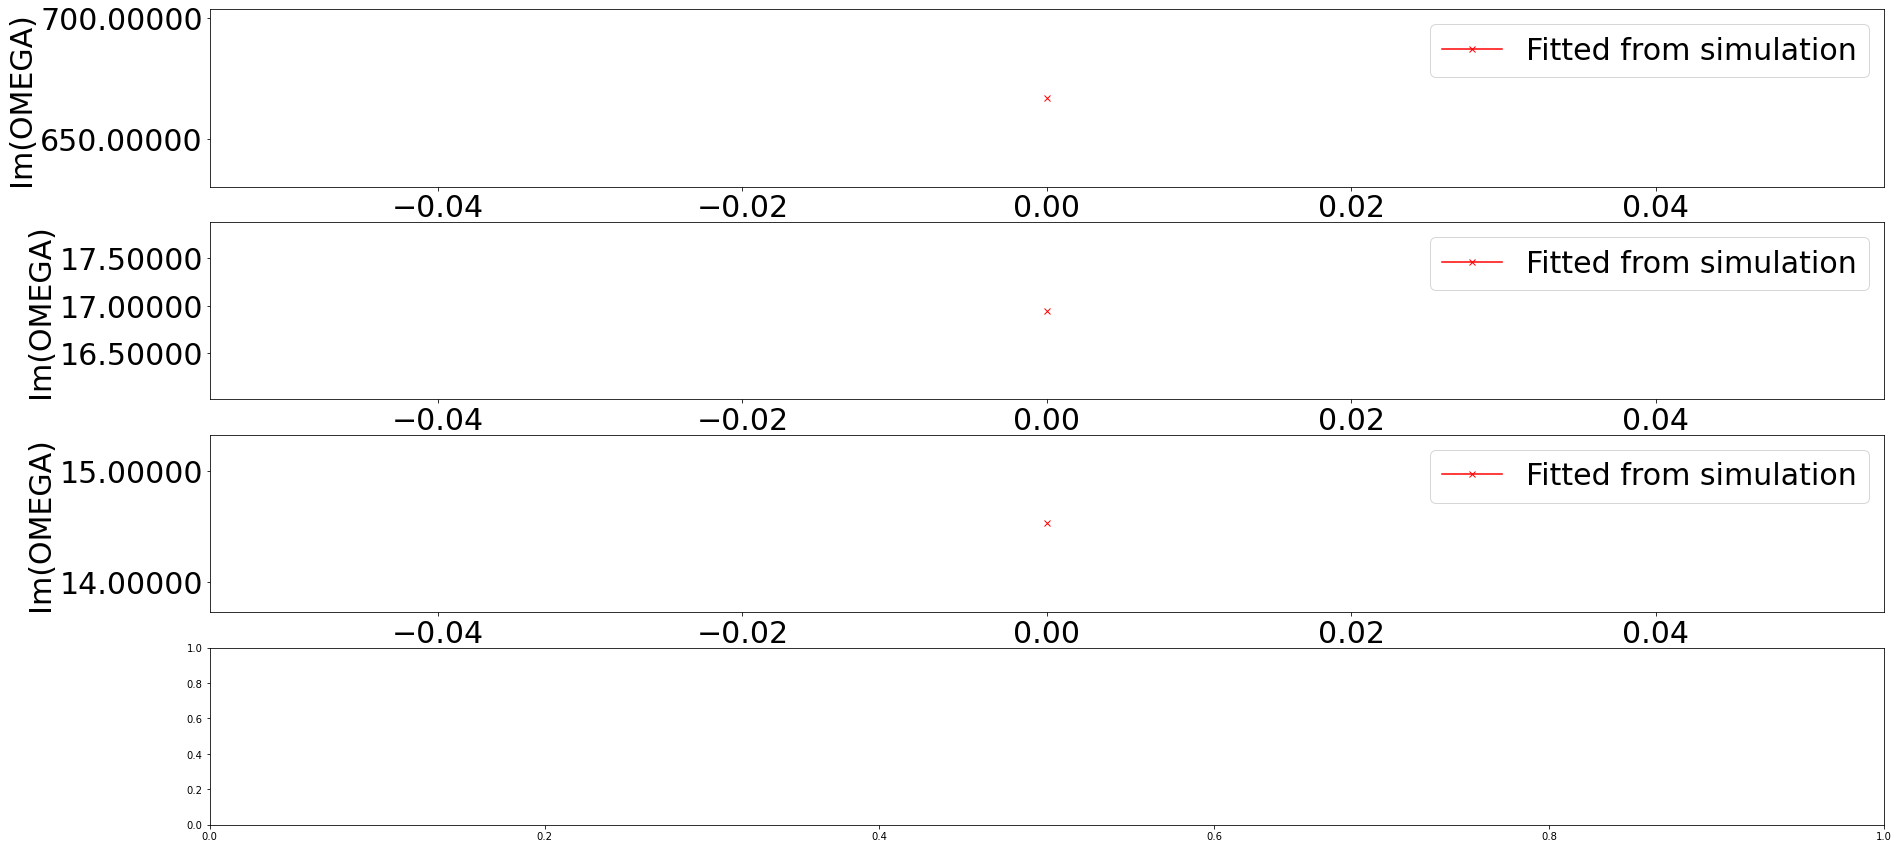

In [18]:
# Omega_Im = qs/T0 vs gain
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(gain,qs[mu]/T0,'rx-')
    axes1[mu].set_xlabel('gain',fontsize=30)
    axes1[mu].set_ylabel('Im(OMEGA)',fontsize=30)
    axes1[mu].legend(["Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_vs_gain.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [19]:
# get analitical number from simple formula (Chao's book)
def Zparallel(Rsh, QL, omega0, omega,gain):
    return Rsh/(1+gain)*omega/(omega+1j*QL/(1+gain)*(omega0-omega**2/omega0)) # using the convention from A. Chao's book
# Small tune shift approximation
r0 = (1*1.6e-19)**2/(1*9.10938356e-31*3e8*3e8)
sigz =  2.5e-3#clight/(f0*h[0])/NpRF # rms bunch length
sigt = sigz/clight #33e-12
sigPhi = 2*pi*f0*sigt

#pmax = 1*64 # number of samples in frequency domain
pmax = int(5*np.sqrt(2)/sigt/nBunch/omega0)
omegas = Qs*f0*2*pi
delta_omega_Re = np.zeros(len(new_folders))
delta_omega_Im = np.zeros(len(new_folders))

delta_omega_Re = np.ndarray([N_mode,len(new_folders)])
delta_omega_Im = np.ndarray([N_mode,len(new_folders)])
ps = np.array([float(i) for i in range(-pmax,pmax+1)])

p_M_omega0 = ps*nBunch*2*np.pi*f0
print("fs = ",omegas/2/pi)
omegas = Qs*2*pi*f0
for mu in mus:
    print("mu = ",mu)
    qidx=0
    for folder in new_folders[:]:
        #print(folder)
        os.chdir(os.path.join(home1,folder))
        cwd = os.getcwd()
        inputfile = os.path.join(cwd,inputfn)
        tempinput = {}
        with open(inputfile) as inputfile:
            for line in inputfile:
                if len(line.split())>1:
                    tempinput[line.split()[0]] = line.split()[1:]
        for i in tempinput:
            for j in range(len(tempinput[i])):
                tempinput[i][j] = float(tempinput[i][j])
        nRF = int(tempinput['nRF'][0])
        nRF1 = int(tempinput['nRF1'][0])
        nRF2 = int(tempinput['nRF2'][0])
        nRFc = int(tempinput['nRFc'][0])


        nTurns = int(tempinput['n_turns'][0])
        nfill = int(tempinput['n_fill'][0])
        n_q_ramp = int(tempinput['n_q_ramp'][0])
        NpRF = int(tempinput['N_bins'][0])
        h = [int(i) for i in tempinput['h']]
        detune_ini = np.array([i for i in tempinput['detune_ini']])
        detune_final = np.array([i for i in tempinput['detune_final']])

        step = int(tempinput['step_store'][0])
        fill_step = int(tempinput['fill_step'][0])
        nBeam = int(tempinput['nBeam'][0])
        beam_shift = int(tempinput['beam_shift'][0])
        nBunch = int(tempinput['n_bunches'][0])
        nPar = int(tempinput['Npar'][0])
        NperBunch = int(tempinput['NperBunch'][0])
        nTot = nBunch*nPar*nBeam
        Gamma0 = tempinput['Gamma'][0]
        Rring = tempinput['R'][0]
        n_record = nTurns/step
        beta = np.sqrt(1-1/Gamma0**2)
        T0 = 2*np.pi*Rring/(clight*beta)
        f0 = 1/T0
        V0 = [i for i in tempinput['Vref_I']]
        V0Q = [i for i in tempinput['Vref_Q']]
        II = [i for i in tempinput['Iref_I']]
        IQ = [i for i in tempinput['Iref_Q']]
        mainRF = int(tempinput['mainRF'][0])
        Pbeam = tempinput['Prad'][0]
        if int(tempinput['type'][0]==2):
            atomicZ = 79
            Ek = Gamma0*E0Au
        else:
            atomicZ =1
        if int(tempinput['type'][0]==1):  
            Ek = Gamma0*E0Elec

        GMTSQ = tempinput['GMTSQ'][0]
        Ek_damp = tempinput['Ek_damp'][0]

        eta = 1/GMTSQ-1/Gamma0**2
        if nRF ==1:
            Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
        elif nRF == 2 :
            Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))
        print("Qs: ",Qs)
        omegarf = 2*np.pi*(np.array(h)*f0)
        omegac = 2*np.pi*(np.array(h)*f0+detune_final)
        Trf = 2*np.pi/omegarf
        RoQ = [i for i in tempinput['RoQ']]
        QL = [i for i in tempinput['QL']]
        R = [RoQ[i]*QL[i] for i in range(nRF)]

        Th = 2*np.pi/omegarf[0]
        dthat =Th/NpRF

        pattern = 'd'+'dd'*nBeam+3*nRF*'d'
        n_stride = 1+2*nBeam+3*nRF
        stride = len(pattern)*8

        # for the calculation of real part of Omega

        omegas1 = ((ps*nBunch+nBunch-mu)*2*np.pi*f0+omegas) # using incoherent omegas for approximation
        Zs1 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas1,gain[qidx]) for i in range(nRF)])
        factor1 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*omegas) # using incoherent omegas for approximation
        deltaOmegaRe = -factor1*np.sum(omegas1*np.imag(Zs1))
        # for the calculation of the imaginary part of Omega
        omegas2 = ((ps*nBunch+nBunch-mu)*2*np.pi*f0+(omegas))

        factor2 = nBunch*NperBunch*r0*eta/(2*Gamma0*T0**2*(omegas))

        Zs2 = np.array([Zparallel(R[i],QL[i],omegac[i],omegas2,gain[qidx]) for i in range(nRF)])
        deltaOmegaIm = factor2*np.sum(omegas2*np.real(Zs2))
        delta_omega_Re[mu][qidx] = deltaOmegaRe
        delta_omega_Im[mu][qidx] = deltaOmegaIm
        print("re_delta_fs = ",deltaOmegaRe/2/pi,"im_delta_omegas = ",deltaOmegaIm)
        qidx+=1


fs =  84.0450812803684
mu =  0
Qs:  0.028034421494909215
re_delta_fs =  -50.72338961961432 im_delta_omegas =  -0.8309483110654383
mu =  1
Qs:  0.028034421494909215
re_delta_fs =  -51.19084788174376 im_delta_omegas =  29.8234977513147
mu =  2
Qs:  0.028034421494909215
re_delta_fs =  -52.53313065179477 im_delta_omegas =  67.42550180666579


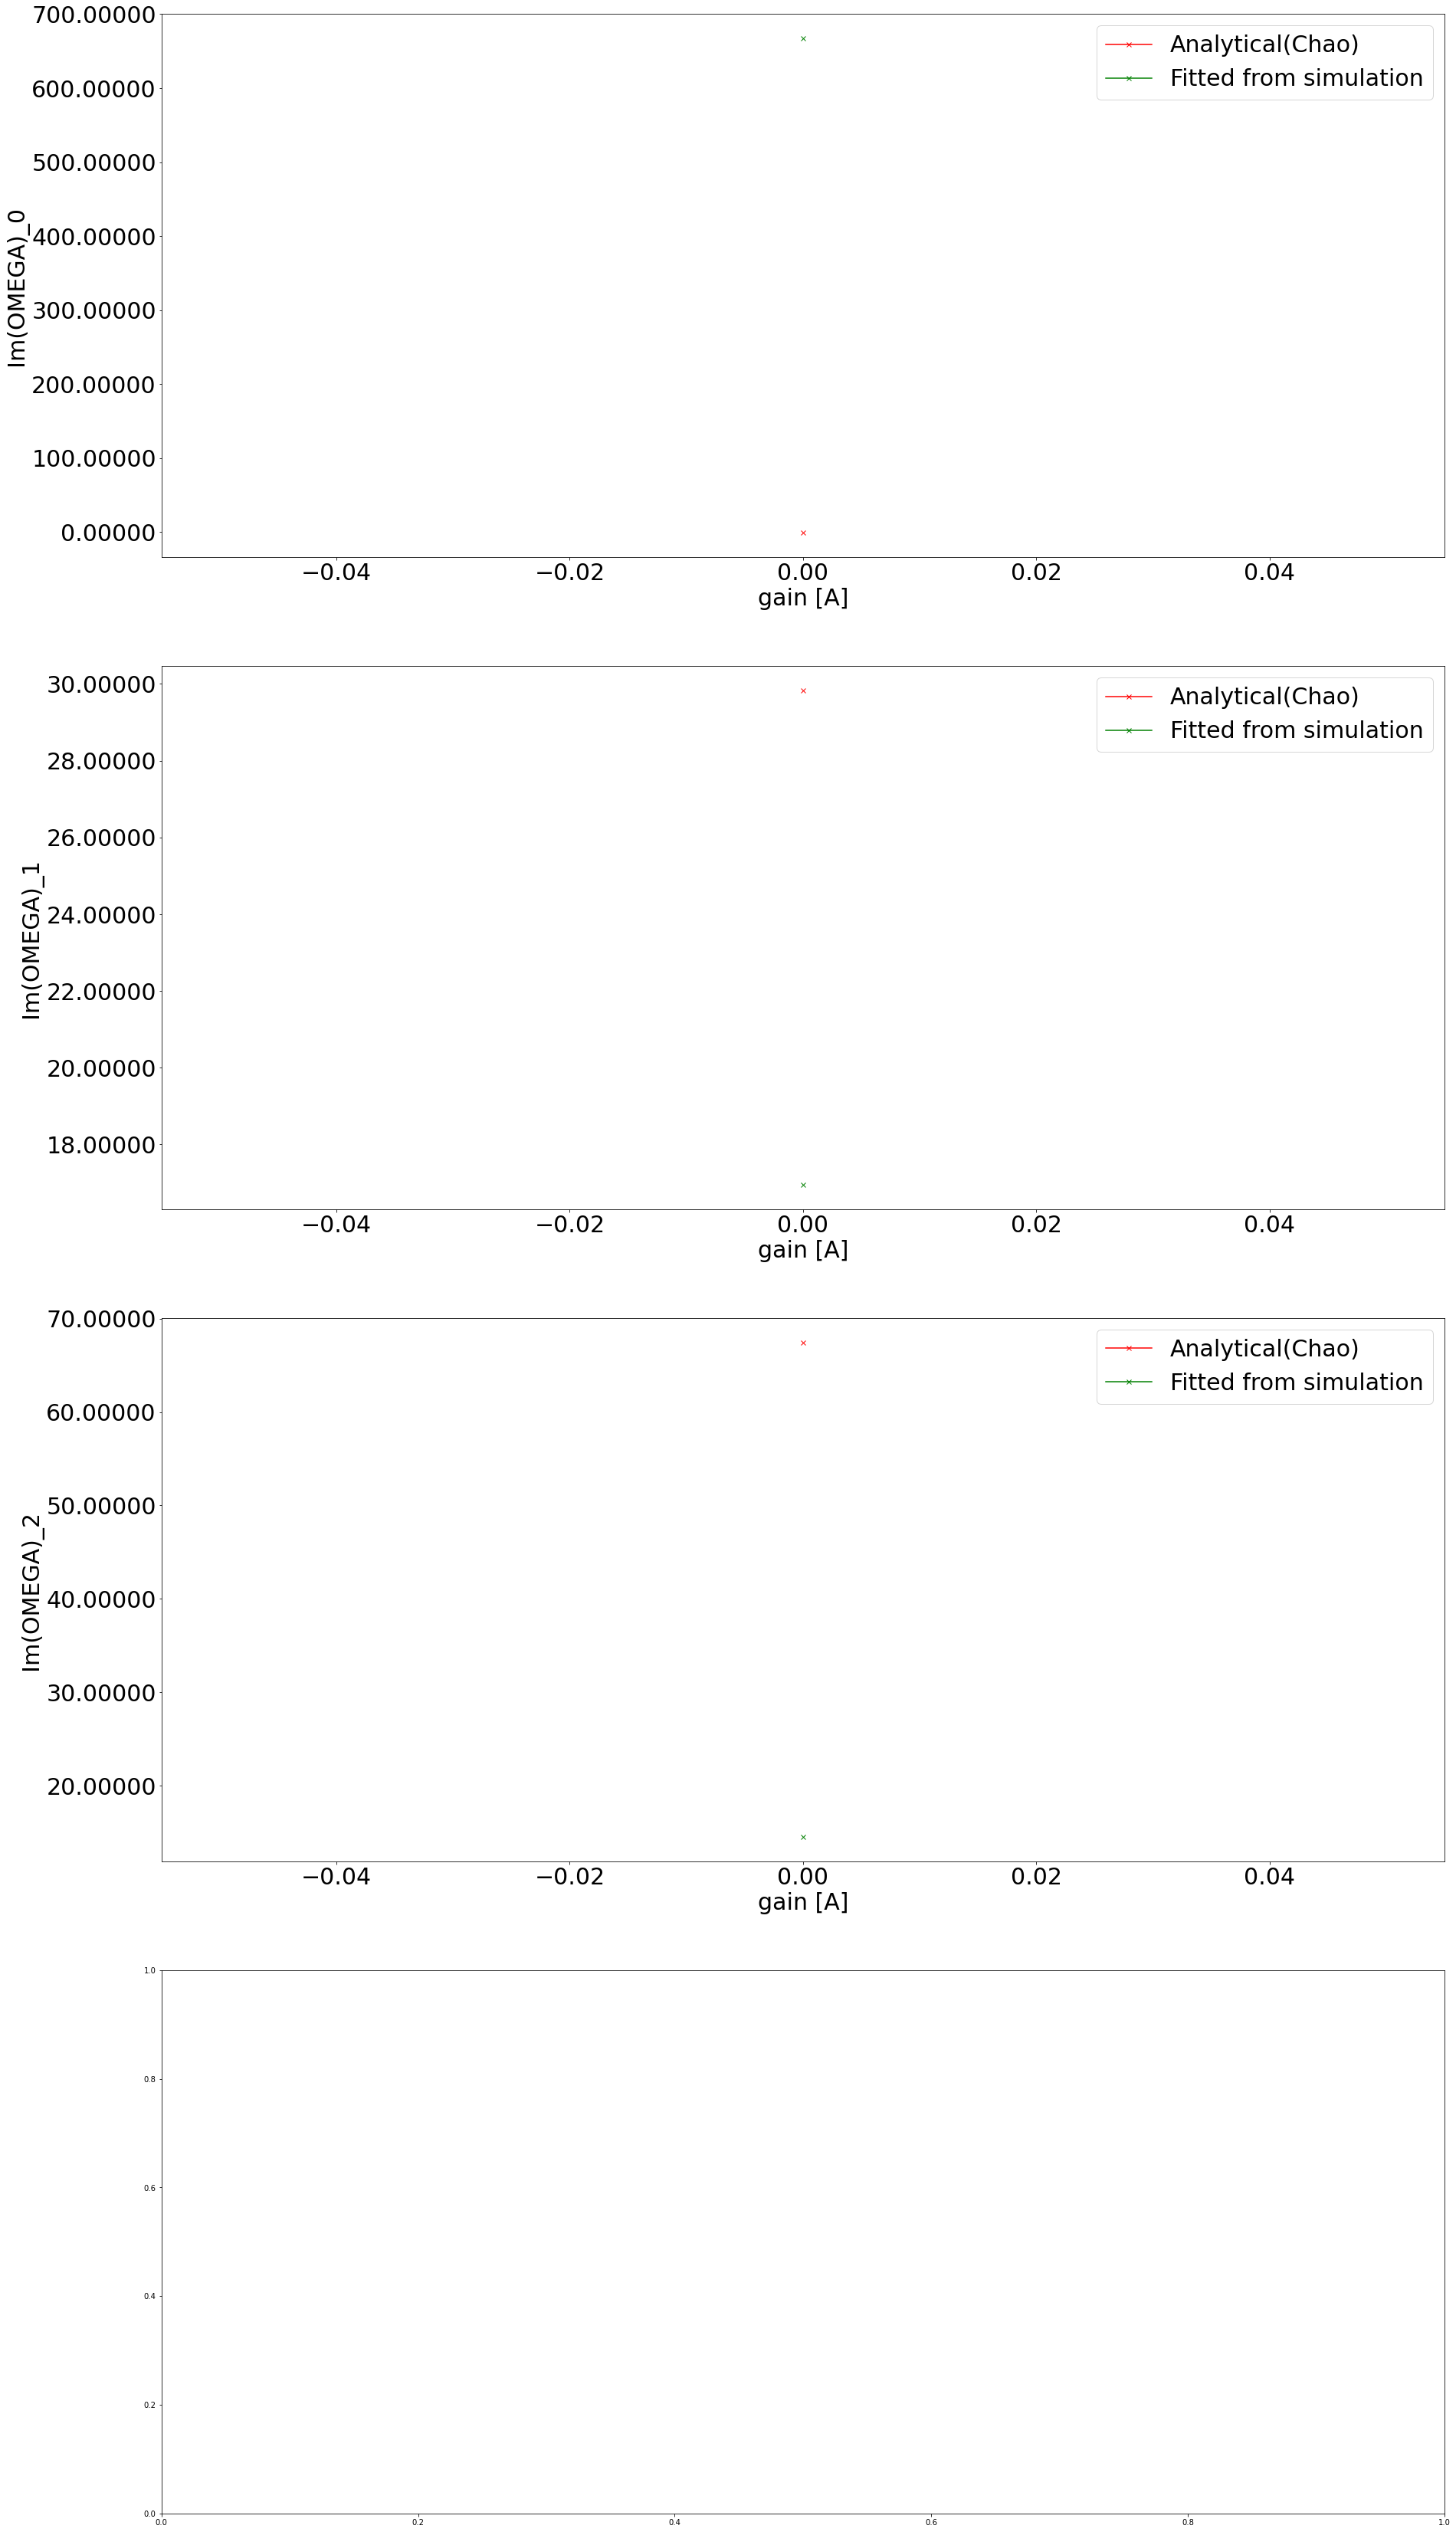

In [20]:
# growth rate Omega_Im vs gain
os.chdir(home1)
cwd = os.getcwd()
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15*(N_mode+1))
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(gain,delta_omega_Im[mu],'rx-')
    axes1[mu].plot(gain,qs[mu]/T0,'gx-')
    axes1[mu].set_ylabel('Im(OMEGA)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('gain [A]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))
fn_growth_rate = os.path.join(cwd,'growth_rate_analytical_vs_gain.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()


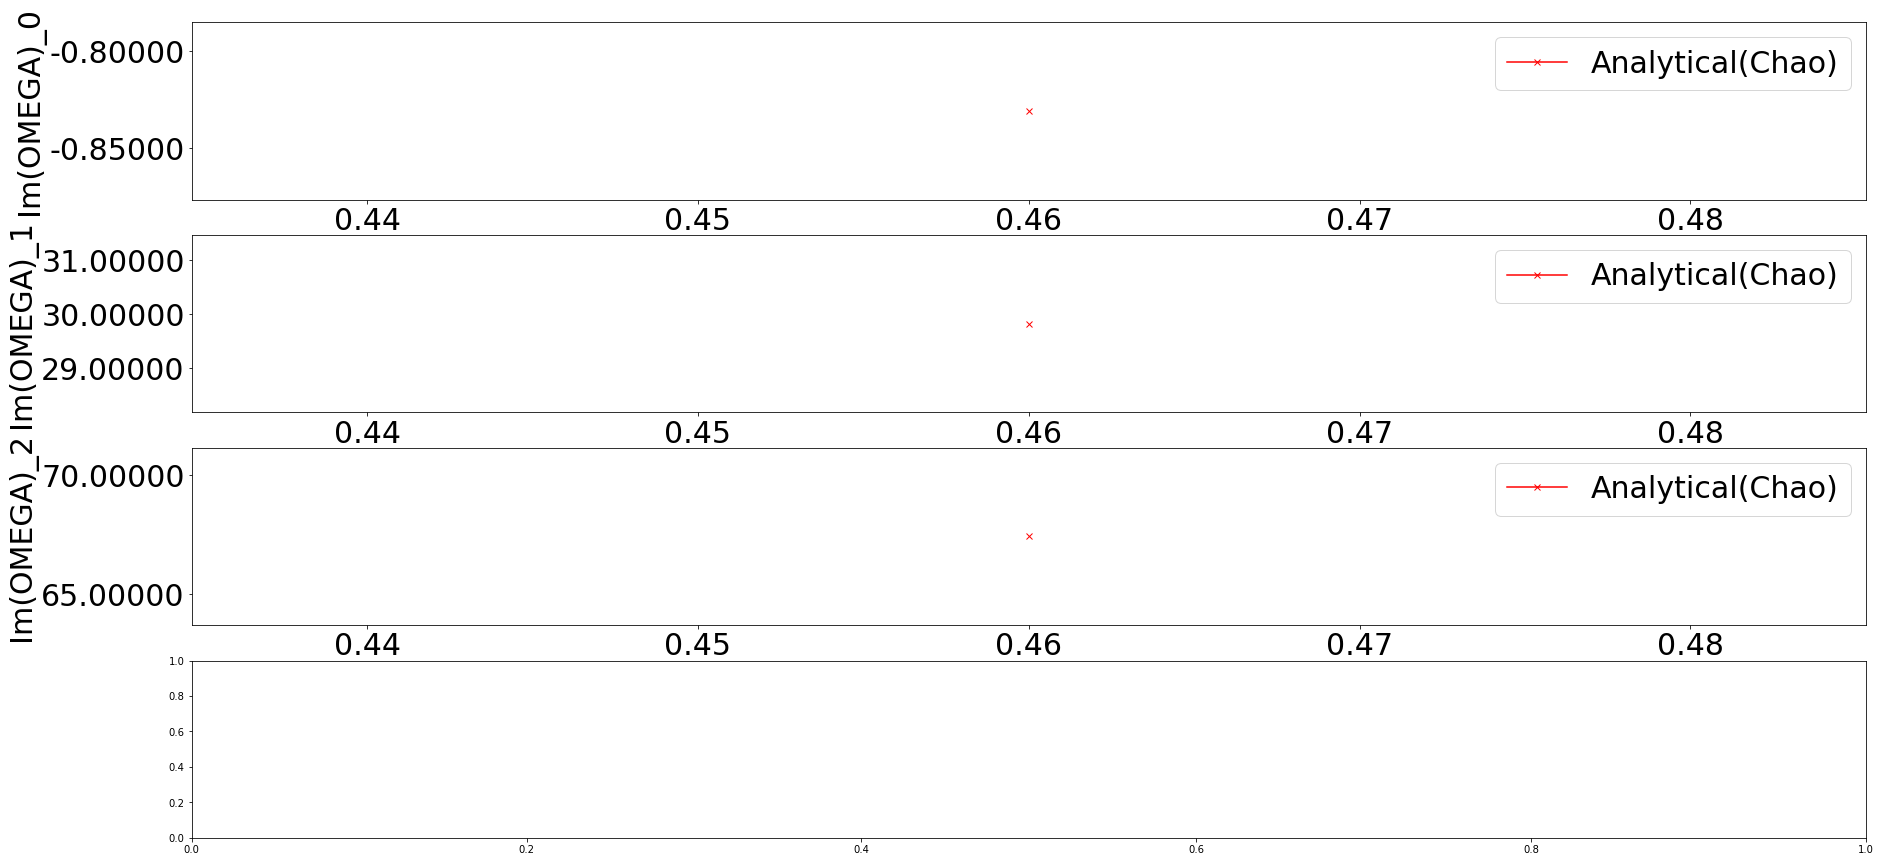

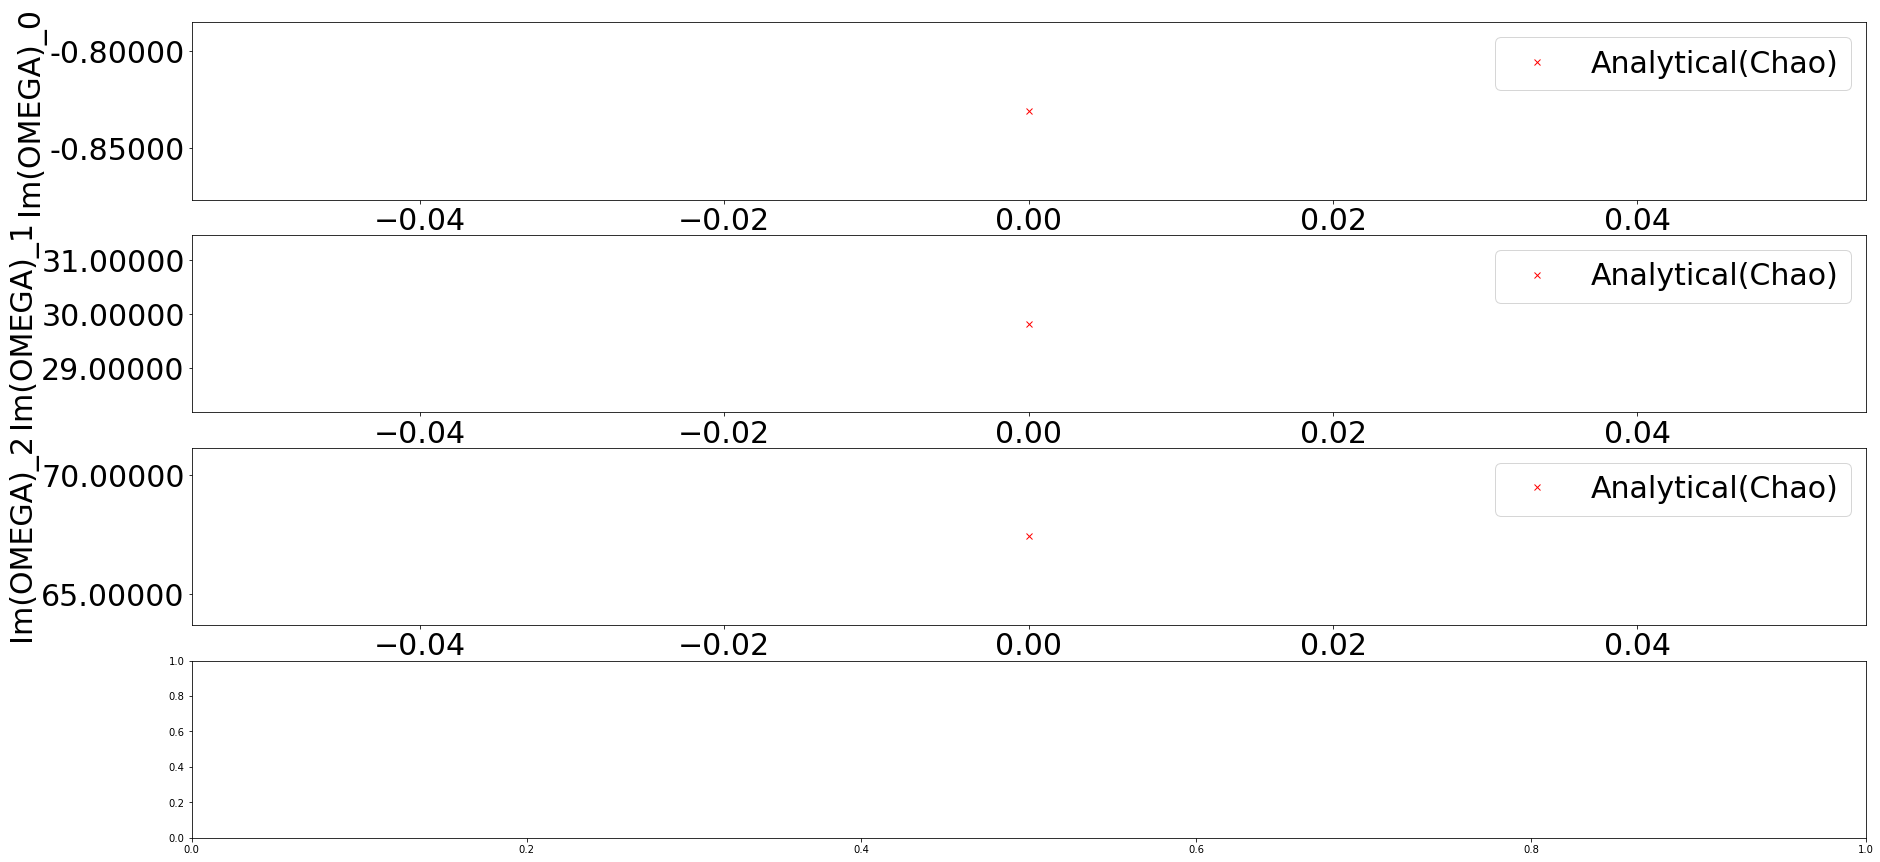

In [21]:
# growth rate Omega_Im vs current and vs thetaL
os.chdir(home1)
cwd = os.getcwd()
fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(current,delta_omega_Im[mu],'rx-')
    axes1[mu].set_ylabel('Im(OMEGA)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))
fn_growth_rate = os.path.join(cwd,'growth_rate_analytical.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

fig1,axes1 = plt.subplots(N_mode+1,1)
fig1.set_figheight(15)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(thetaL,delta_omega_Im[mu],'rx')
    axes1[mu].set_ylabel('Im(OMEGA)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('ThetaL [degree]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_analytical_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [22]:
# iterative solver
def F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi):
    omega0 = f0*2*pi
    fact = np.math.factorial(m-1)
    nMmu = ps*nBunch+mu
    omegasamp = ((ps*nBunch+mu)*2*np.pi*f0+Omega)
    Zs = np.array([Zparallel(R[i],QL[i],omegac[i],omegasamp,gain) for i in range(nRF)])
    factor = nBunch*NperBunch*r0*eta/(Gamma0*T0**2)/T0*4*pi*(m/fact)/(2**m)*sigPhi**(2*m-2)
    return (Omega**2-(1j*factor*np.sum((omegasamp/omega0)**(2*m-1)*Zs*np.exp(-nMmu**2*sigPhi**2))+(Qs*f0*2*pi)**2))/(Qs*f0*2*pi)**2

def SolveOmega(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,maxIter,accu,gain,sigPhi):
    nIter = 0
    maxstep = 1000
    # initial values
    OmegaR = np.real(Omega)
    OmegaI = np.imag(Omega)
    Omegat1 = Omega
    Omegat2 = Omegat1
    # step size
    sig1 = 1e-7
    sig2 = 1e-7*1j
    Err = F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi)
    Err_store = Err
    while(np.abs(Err)>accu and nIter<maxIter):
        OmegaR = np.real(Omega)
        OmegaI = np.imag(Omega)
        Omegat1 = Omega
        Err = F(Omega,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi)
        F1 = F(Omega+sig1,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi) # change OmegaRe by a small step
        F2 = F(Omega+sig2,ps,mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,gain,sigPhi) # change OmegaIm by a small step
        Fre = np.real(Err)
        Fim = np.imag(Err)
        F1re = np.real(F1)
        F1im = np.imag(F1)
        F2re = np.real(F2)
        F2im = np.imag(F2)
        # approximate the Jacobian
        dF11 = (F1re-Fre)/np.abs(sig1)
        dF12 = (F2re-Fre)/np.abs(sig1)
        dF21 = (F1im-Fim)/np.abs(sig2)
        dF22 = (F2im-Fim)/np.abs(sig2)
        
        det = dF11*dF22-dF12*dF21
        # inverse the Jacobian
        dF11inv = dF22/det
        dF12inv = -dF12/det
        dF21inv = -dF21/det
        dF22inv = dF11/det
        dFR = Fre*dF11inv+Fim*dF12inv
        if dFR >maxstep:
            OmegaR -= maxstep
        else:
            OmegaR -= dFR
        dFI = Fre*dF21inv+Fim*dF22inv
        if dFI > maxstep:
            OmegaI -= maxstep
        else:
            OmegaI -= dFI
        
        Omega = OmegaR+OmegaI*1j
        nIter += 1
        #if np.abs(Omega-Omegat2) < 1e-7:
        #    print("Omega  : ", Omega)
        #    print("Omega1 : ", Omegat1)
        #    print("Omega2 : ", Omegat2)
        #    print("Err    : ", Err)
        #    Omega=(Omegat2+Omegat1)/2
        #else:
        #    Omegat2 = Omegat1
        
        Err_store = Err
    if nIter == maxIter:
        print("Maxed out!","...","Err = ",Err)
        print("OMEGA = ",Omega)
        return 1-1e100*1j
    #print(np.abs(Err))
    return Omega
    print(Omega)
    print(nIter)

In [29]:
# Iteratively solve:

delta_omega_Re_Iter = np.ndarray([N_mode,len(new_folders)])
delta_omega_Im_Iter = np.ndarray([N_mode,len(new_folders)])

N_OMEGA_guss = 170
phistart = -85/180*pi
phiend = 85/180*pi
dphi = (phiend-phistart)/N_OMEGA_guss
OMEAG_ini = [omegas*np.exp(1j*phistart)*np.exp(1j*i*dphi) for i in range(N_OMEGA_guss)]
m = 1
sigz =  2.5e-3#clight/(f0*h[0])/NpRF # rms bunch length
sigt = sigz/clight #33e-12
sigPhi = 2*pi*f0*sigt

#pmax = 1*64 # number of samples in frequency domain
pmax = int(5*np.sqrt(2)/sigt/nBunch/omega0)
print (pmax)
omegas = Qs*f0*2*pi

ps = np.array([float(i) for i in range(-pmax,pmax+1)])

p_M_omega0 = ps*nBunch*2*np.pi*f0
print("fs = ",omegas/2/pi)
omegas = Qs*2*pi*f0
for mu in mus[:]:
    qidx=0

    for folder in new_folders[:]:
        print(folder)
        os.chdir(os.path.join(home1,folder))
        cwd = os.getcwd()
        inputfile = os.path.join(cwd,inputfn)
        tempinput = {}
        with open(inputfile) as inputfile:
            for line in inputfile:
                if len(line.split())>1:
                    tempinput[line.split()[0]] = line.split()[1:]
        for i in tempinput:
            for j in range(len(tempinput[i])):
                tempinput[i][j] = float(tempinput[i][j])
        nRF = int(tempinput['nRF'][0])
        nRF1 = int(tempinput['nRF1'][0])
        nRF2 = int(tempinput['nRF2'][0])
        nRFc = int(tempinput['nRFc'][0])

        nTurns = int(tempinput['n_turns'][0])
        nfill = int(tempinput['n_fill'][0])
        n_q_ramp = int(tempinput['n_q_ramp'][0])
        NpRF = int(tempinput['N_bins'][0])
        h = [int(i) for i in tempinput['h']]
        detune_ini = np.array([i for i in tempinput['detune_ini']])
        detune_final = np.array([i for i in tempinput['detune_final']])

        step = int(tempinput['step_store'][0])
        fill_step = int(tempinput['fill_step'][0])
        nBeam = int(tempinput['nBeam'][0])
        beam_shift = int(tempinput['beam_shift'][0])
        nBunch = int(tempinput['n_bunches'][0])
        nPar = int(tempinput['Npar'][0])
        NperBunch = int(tempinput['NperBunch'][0])
        nTot = nBunch*nPar*nBeam
        Gamma0 = tempinput['Gamma'][0]
        Rring = tempinput['R'][0]
        n_record = nTurns/step
        beta = np.sqrt(1-1/Gamma0**2)
        T0 = 2*np.pi*Rring/(clight*beta)
        f0 = 1/T0
        V0 = [i for i in tempinput['Vref_I']]
        V0Q = [i for i in tempinput['Vref_Q']]
        II = [i for i in tempinput['Iref_I']]
        IQ = [i for i in tempinput['Iref_Q']]
        mainRF = int(tempinput['mainRF'][0])
        Pbeam = tempinput['Prad'][0]
        if int(tempinput['type'][0]==2):
            atomicZ = 79
            Ek = Gamma0*E0Au
        else:
            atomicZ =1
        if int(tempinput['type'][0]==1):  
            Ek = Gamma0*E0Elec

        GMTSQ = tempinput['GMTSQ'][0]
        Ek_damp = tempinput['Ek_damp'][0]

        eta = 1/GMTSQ-1/Gamma0**2
        if nRF ==1:
            Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF])*eta/(2*np.pi*Ek))
        elif nRF == 2 :
            Qs = np.sqrt(h[mainRF]*atomicZ*np.abs(V0[mainRF]+V0[1])*eta/(2*np.pi*Ek))
        print("Qs: ",Qs)
        omegarf = 2*np.pi*(np.array(h)*f0)
        omegac = 2*np.pi*(np.array(h)*f0+detune_final)
        #omegac = omegac+np.array([200*2*pi,0])
        Trf = 2*np.pi/omegarf
        RoQ = [i for i in tempinput['RoQ']]
        QL = [i for i in tempinput['QL']]
        R = [RoQ[i]*QL[i] for i in range(nRF)]

        Th = 2*np.pi/omegarf[0]
        dthat =Th/NpRF

        pattern = 'd'+'dd'*nBeam+3*nRF*'d'
        n_stride = 1+2*nBeam+3*nRF
        stride = len(pattern)*8
        test = array('d')
        print("dfc: ",omegac/2/pi-f0*h[0])
        print("NperBunch: ",NperBunch/1e11)
        print("nBunch: ",nBunch)

        print("QL: ",QL)
        #print("R: ",R)
        maxOMEGAIM = -1e360            
        print("Current mode : ",mu)

        for Omega in OMEAG_ini:
            t_omega = Omega*1.0
            temp = SolveOmega(Omega,ps,nBunch-mu,m,nRF,R,QL,omegac,nBunch, NperBunch,r0,eta,Gamma0,T0,Qs,f0,5000,1e-5,gain[qidx],sigPhi)
            if np.imag(temp)>maxOMEGAIM:
                #print("Found a bigger one : ",t_omega,np.arctan(np.imag(t_omega)/np.real(t_omega))/pi*180)
                print("Found a bigger one : ",temp)
                maxOMEGAIM = np.imag(temp)
                delta_omega_Re_Iter[mu][qidx] = np.real(temp)
                delta_omega_Im_Iter[mu][qidx] = np.imag(temp)
        print("---------------------")
        print(qidx,'; ','df_re, Omega_im',(delta_omega_Re_Iter[mu][qidx]-omegas)/2/pi,delta_omega_Im_Iter[mu][qidx])
        print("---------------------")
        qidx+=1
omega_im_iter = pd.DataFrame(delta_omega_Im_Iter)
omega_im_iter.to_csv('iter.txt')

3321
fs =  84.0450812803684
0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0degree
Qs:  0.028034421494909215
dfc:  [-17837.12752056]
NperBunch:  0.70843480185
nBunch:  13551
QL:  [47472.192372692]
Current mode :  0
Found a bigger one :  (0.00013063252908950863-81.28376293556467j)
Found a bigger one :  (0.00017214595476236494-81.28376203895597j)
Found a bigger one :  (1.6107534046256233e-05-81.2837554076285j)
Found a bigger one :  (-3.796063254060981e-05-81.28374413732709j)
Found a bigger one :  (7.076020044700536e-05-81.28371383693383j)
Found a bigger one :  (-3.888966920524944e-06+79.62385804091241j)
Found a bigger one :  (-7.654494454008894e-05+79.62385819039577j)
Found a bigger one :  (4.752351225516e-05+79.62385837564716j)
Found a bigger one :  (-1.4636746407038553e-05+79.623865543912j)
Found a bigger one :  (8.357163205047072e-05+79.623880385987j)
---------------------
0 ;  df_re, Omega_im -84.04506797953005 79.623880385987
---------------------
0000nmacro1440_nBin65_Idc0.46A_ThetaL0.0deg

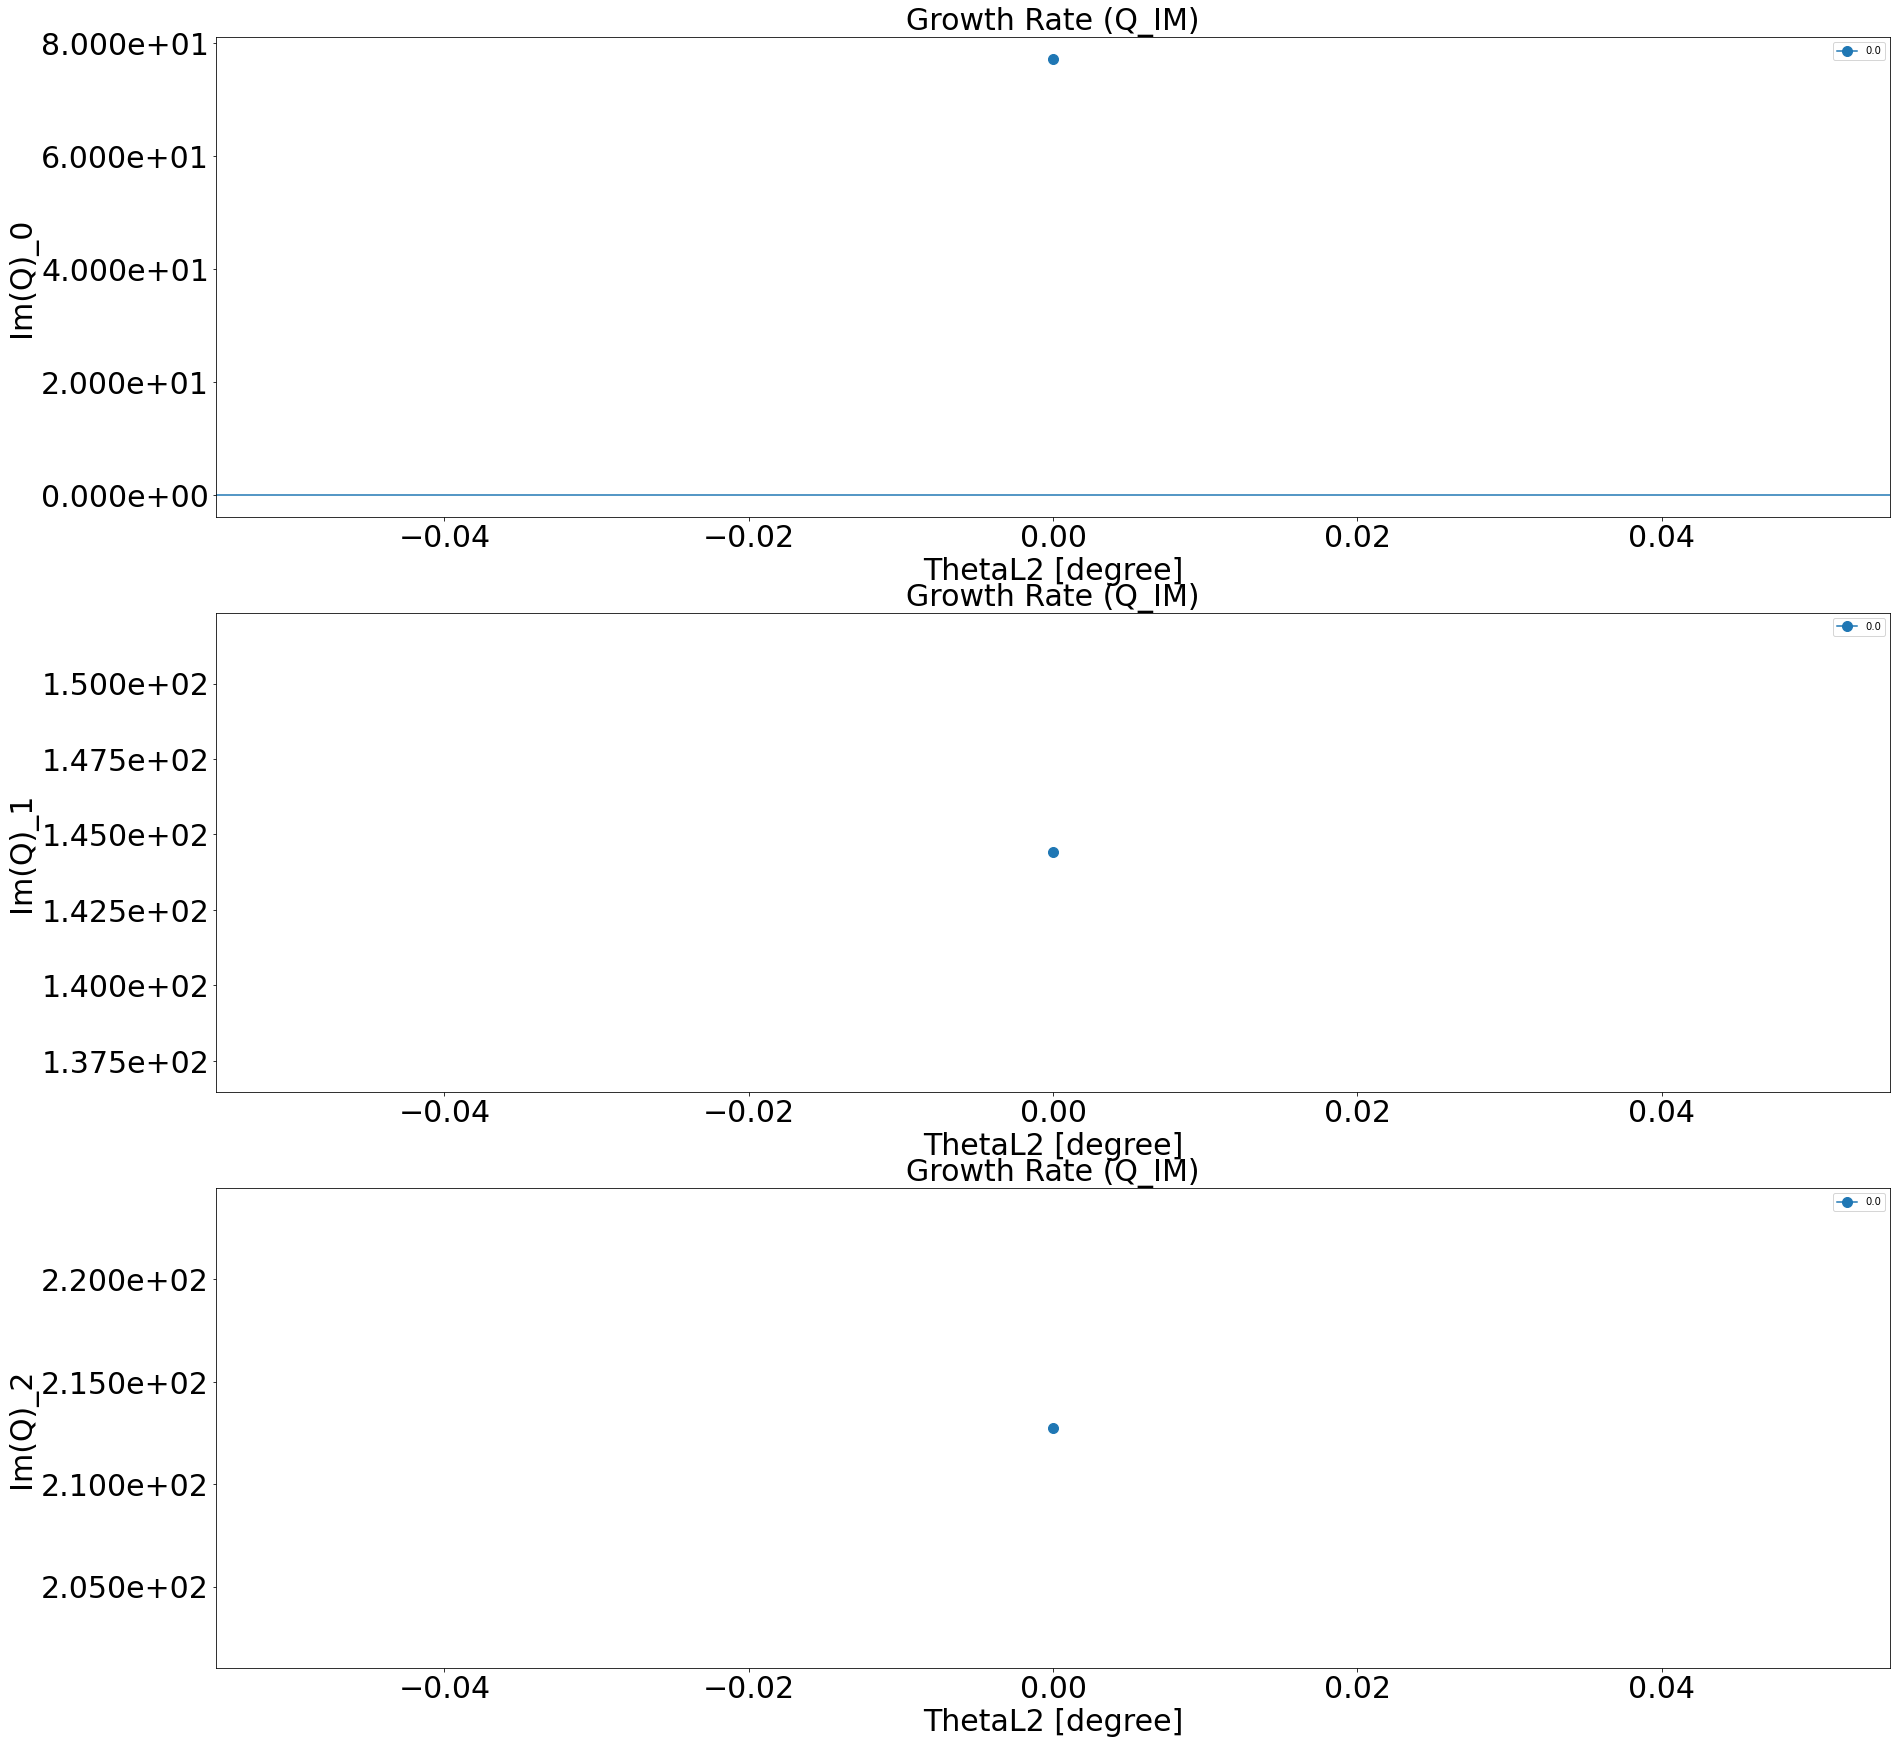

In [30]:
# plot the growth rate vs thetaL
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
step = 1#int(np.sqrt(len(thetaL)))
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
legend = np.array([str(thetaL[i*step]) for i in range(rng2)])
for mu in mus:
    for i in range(rng2):
        axes1[mu].plot(thetaL[:step],delta_omega_Im_Iter[mu][(i+rng1)*step:(i+rng1+1)*step]-1/t_rad_long,'.-', ms = 20)
        
        #axes1[0].set_ylim([-10,2.5e4])
        axes1[mu].set_title('Growth Rate (Q_IM)',fontsize=30)
        axes1[mu].set_ylabel('Im(Q)_'+str(mu),fontsize=30)
        axes1[mu].set_xlabel('ThetaL2 [degree]',fontsize=30)        
        axes1[mu].legend(legend,prop={'size': 10})
        axes1[mu].tick_params(labelsize=30)
        y_labels = axes1[mu].get_yticks()
        axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3e'))
axes1[0].axhline(y=0)
fn_growth_rate = os.path.join(cwd,'growth_rate_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [25]:
#from Mike
df_mike = np.array([1e3,500,200,150,100,0,-100,-500,-1000])-62

Qs_im_Mike = np.array([8.380303530419759E-003,4.904988025679834E-003,1.270828384461267E-003,-1.350914374513282E-005,-1.564092604978454E-003,-1.543205030896789E-003,-1.522677031621000E-003,-1.443970071172335E-003,-1.352754010995370E-003])
Omegas_im_Mike = Qs_im_Mike*f0*2*pi
Qs_re_Mike = np.array([0,0,0,0,1.805427472237517E-003,3.818720761623957E-003,5.080606373820799E-003, 8.355908859887805E-003,1.108401160068463E-002])
Omegas_re_Mike = Qs_re_Mike*f0*2*pi

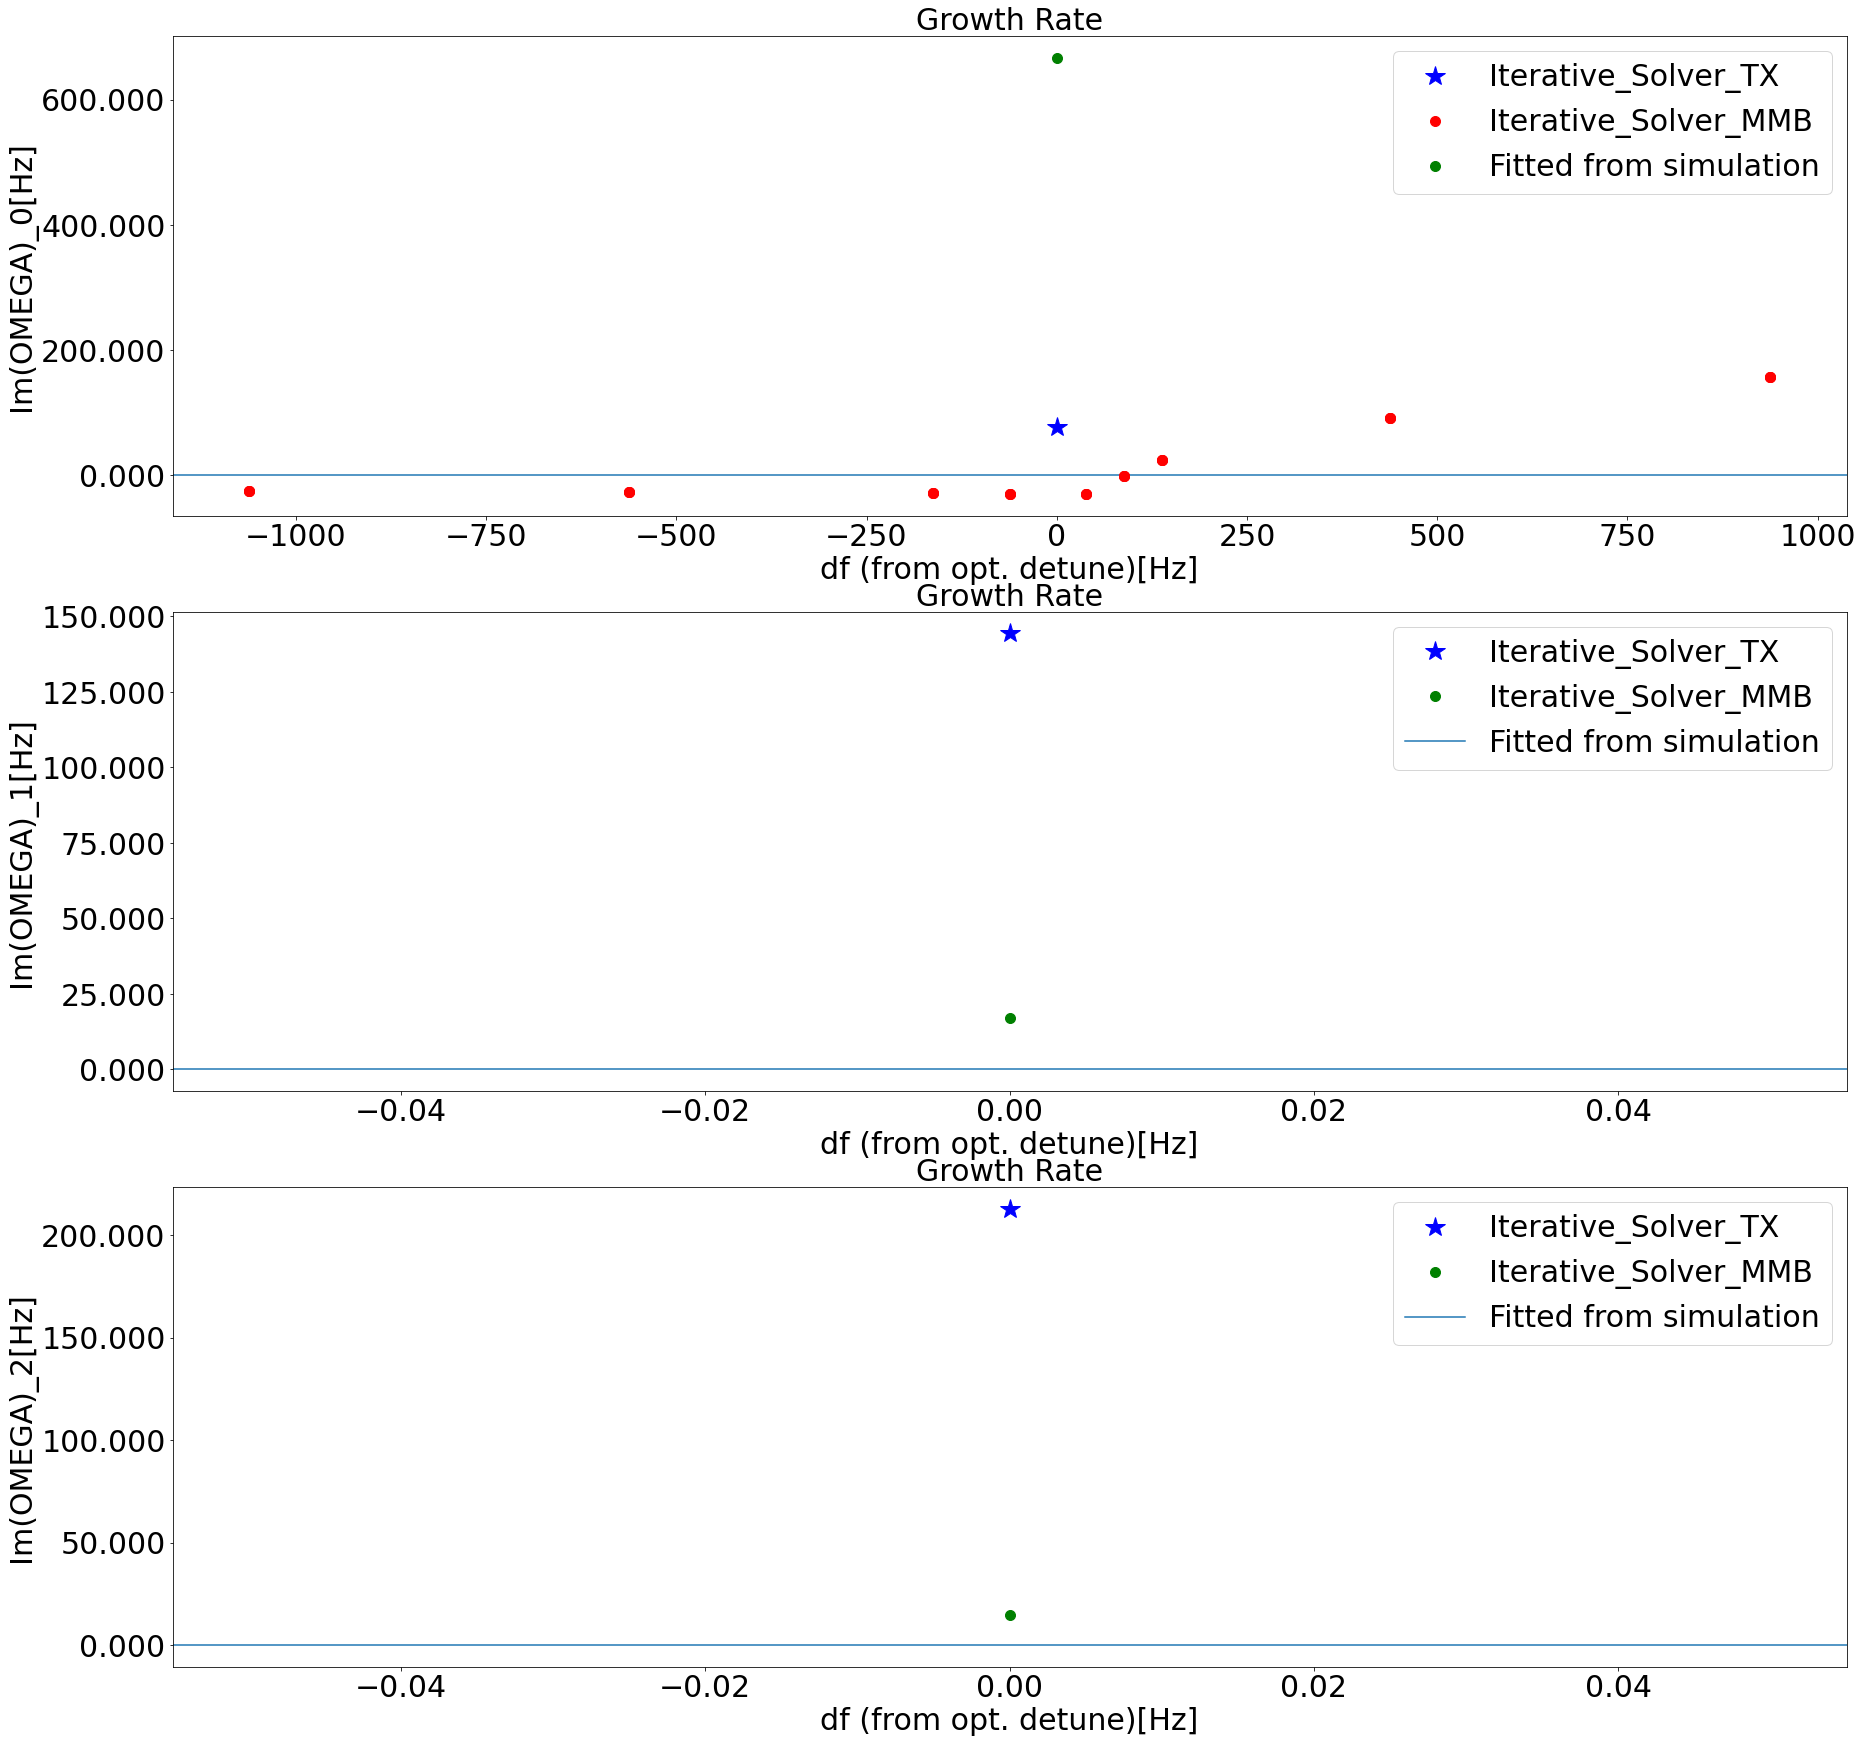

In [26]:
# plot the growth rate vs df
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(ddf)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    #axes1[mu].plot(ddf[rng1:rng2],delta_omega_Im[mu][rng1:rng2]-1/t_rad_long,'rx', ms = 20)
    axes1[mu].plot(ddf[rng1:rng2],delta_omega_Im_Iter[mu][rng1:rng2]-1/t_rad_long,'b*', ms = 20)
    axes1[0].plot(df_mike,Omegas_im_Mike,'r.', ms = 20)
    axes1[mu].plot(ddf[rng1:rng2],qs[mu][rng1:rng2]/T0,'g.', ms = 20)
    axes1[mu].axhline(y=0)
    #axes1[0].set_ylim([-10,2.5e4])
    axes1[mu].set_title('Growth Rate',fontsize=30)
    axes1[mu].set_ylabel('Im(OMEGA)_'+str(mu)+'[Hz]',fontsize=30)
    axes1[mu].set_xlabel('df (from opt. detune)[Hz]',fontsize=30)
    axes1[mu].legend(["Iterative_Solver_TX","Iterative_Solver_MMB","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3f'))

fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [37]:
1/t_rad_long

2.3529411764705883

In [40]:
delta_omega_Im_Iter[0]

array([79.62388039])

In [41]:
qs[0][:]/T0

array([625.70992422])

In [42]:
T0

0.0003335640952191882

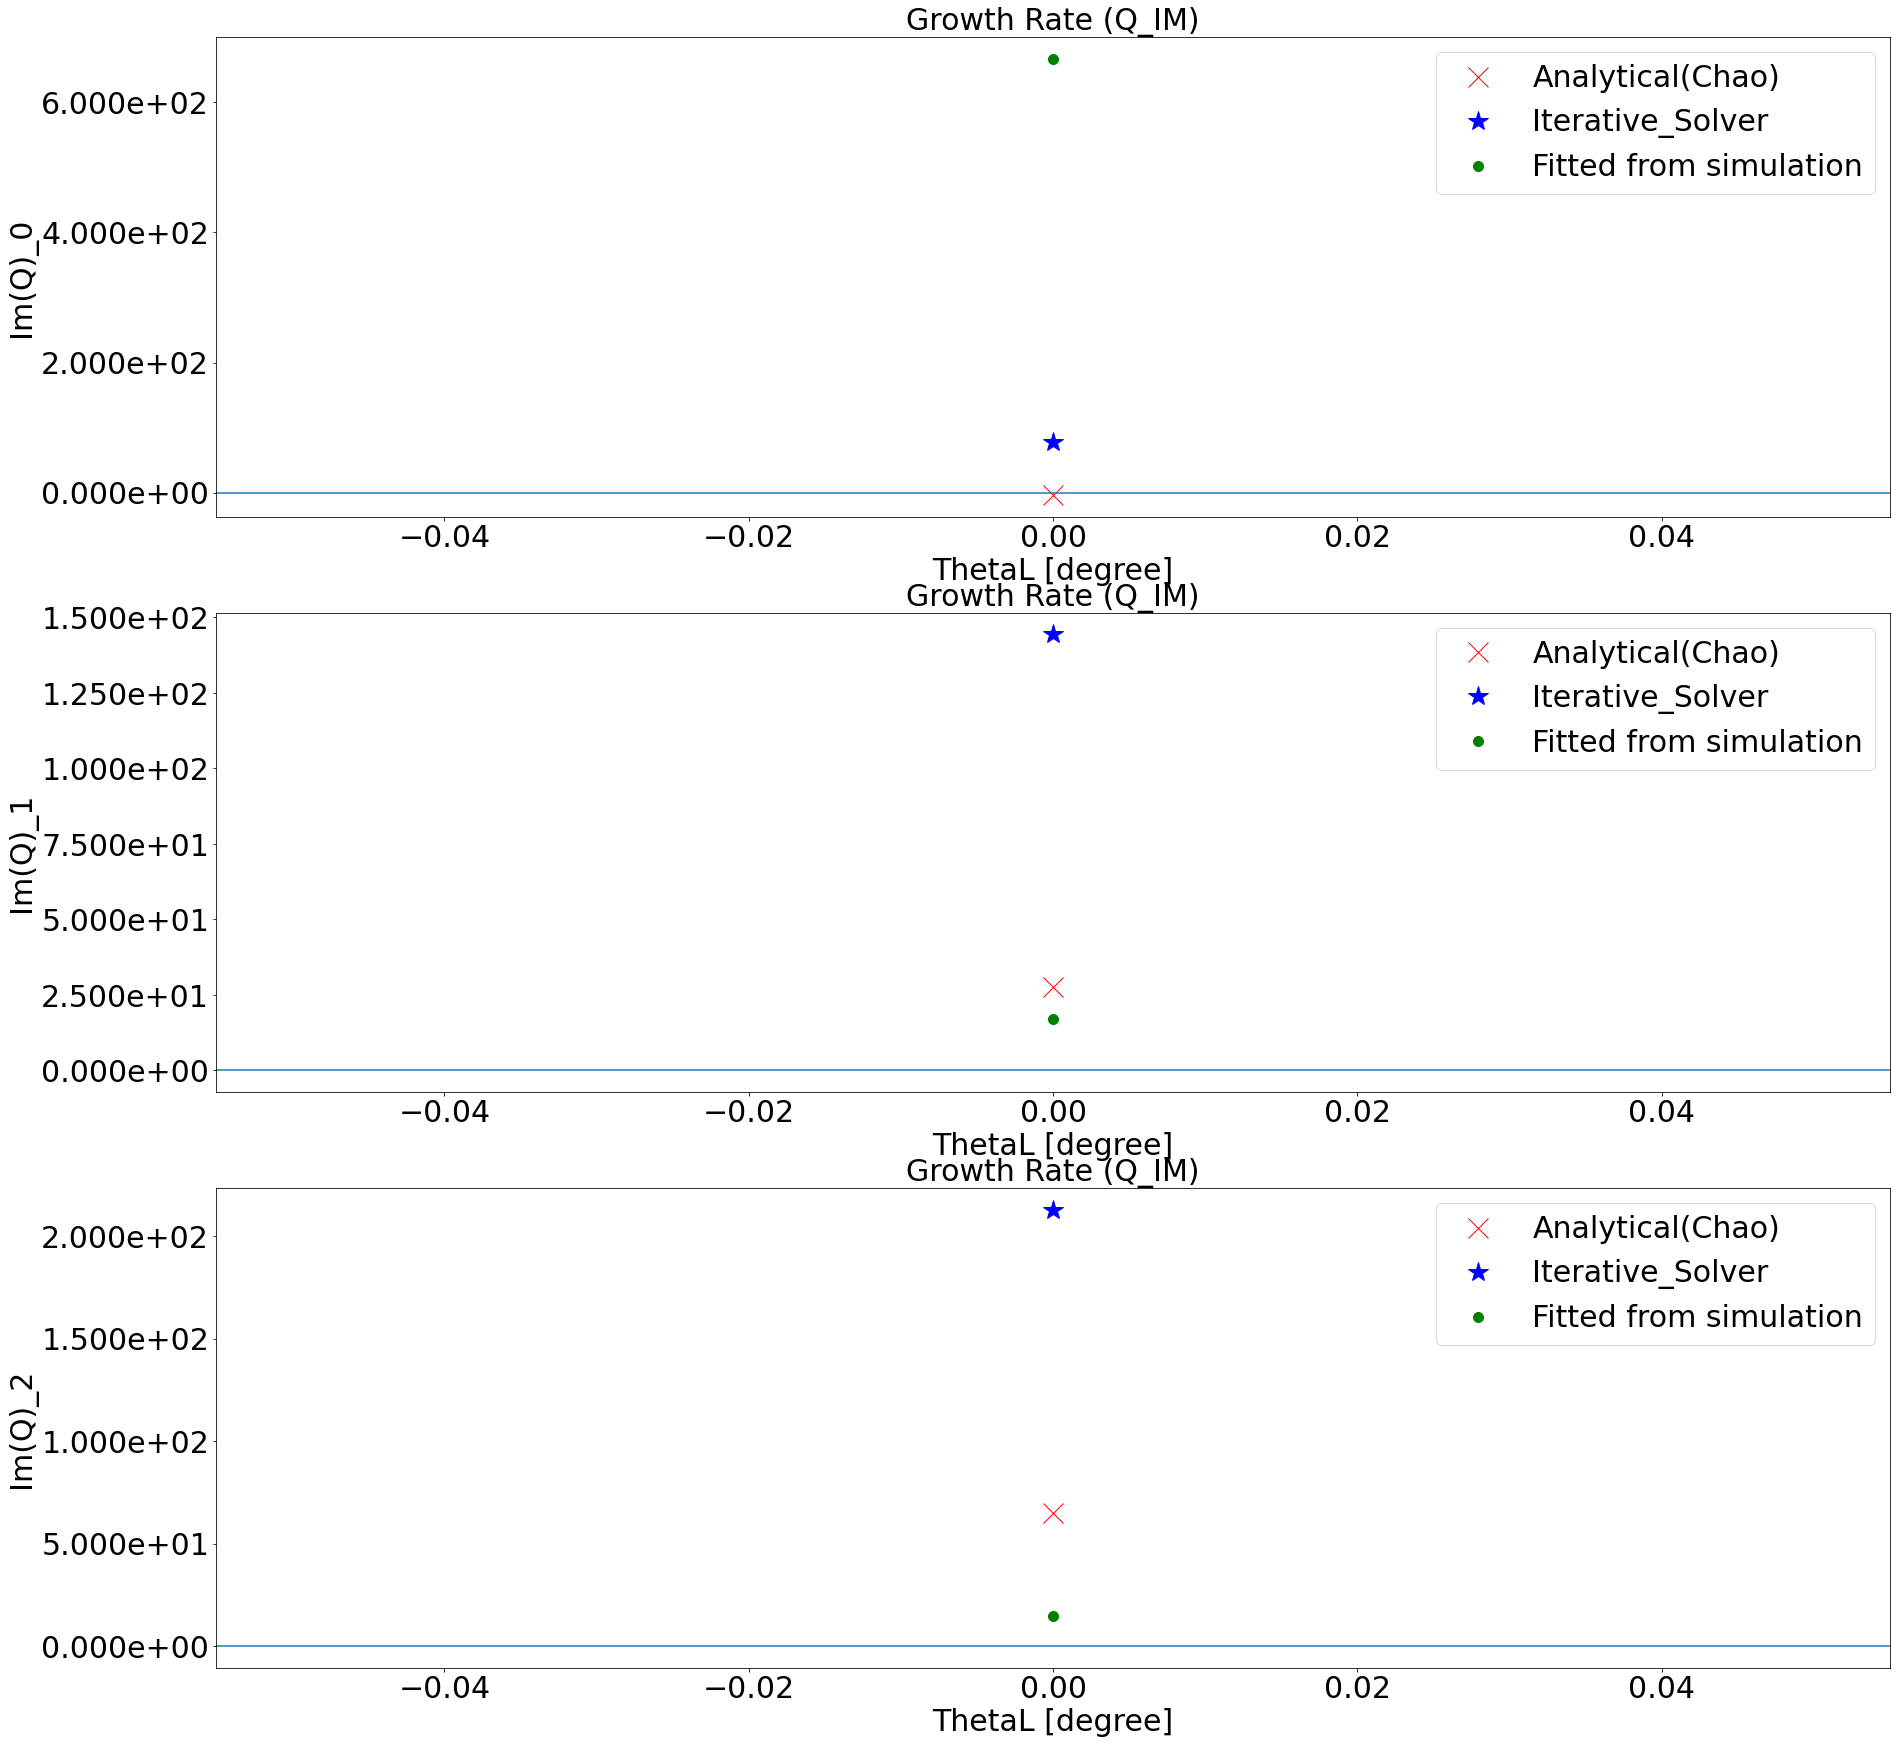

In [27]:
# plot the growth rate vs thetaL
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(thetaL[rng1:rng2],delta_omega_Im[mu][rng1:rng2]-1/t_rad_long,'rx', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],delta_omega_Im_Iter[mu][rng1:rng2]-1/t_rad_long,'b*', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],qs[mu][rng1:rng2]/T0,'g.', ms = 20)
    axes1[mu].axhline(y=0)
    #axes1[0].set_ylim([-10,2.5e4])
    axes1[mu].set_title('Growth Rate (Q_IM)',fontsize=30)
    axes1[mu].set_ylabel('Im(Q)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('ThetaL [degree]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)", "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3e'))

fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

/home/tianmu/Documents/Code/APES/run_scripts/CEPC/test_Z


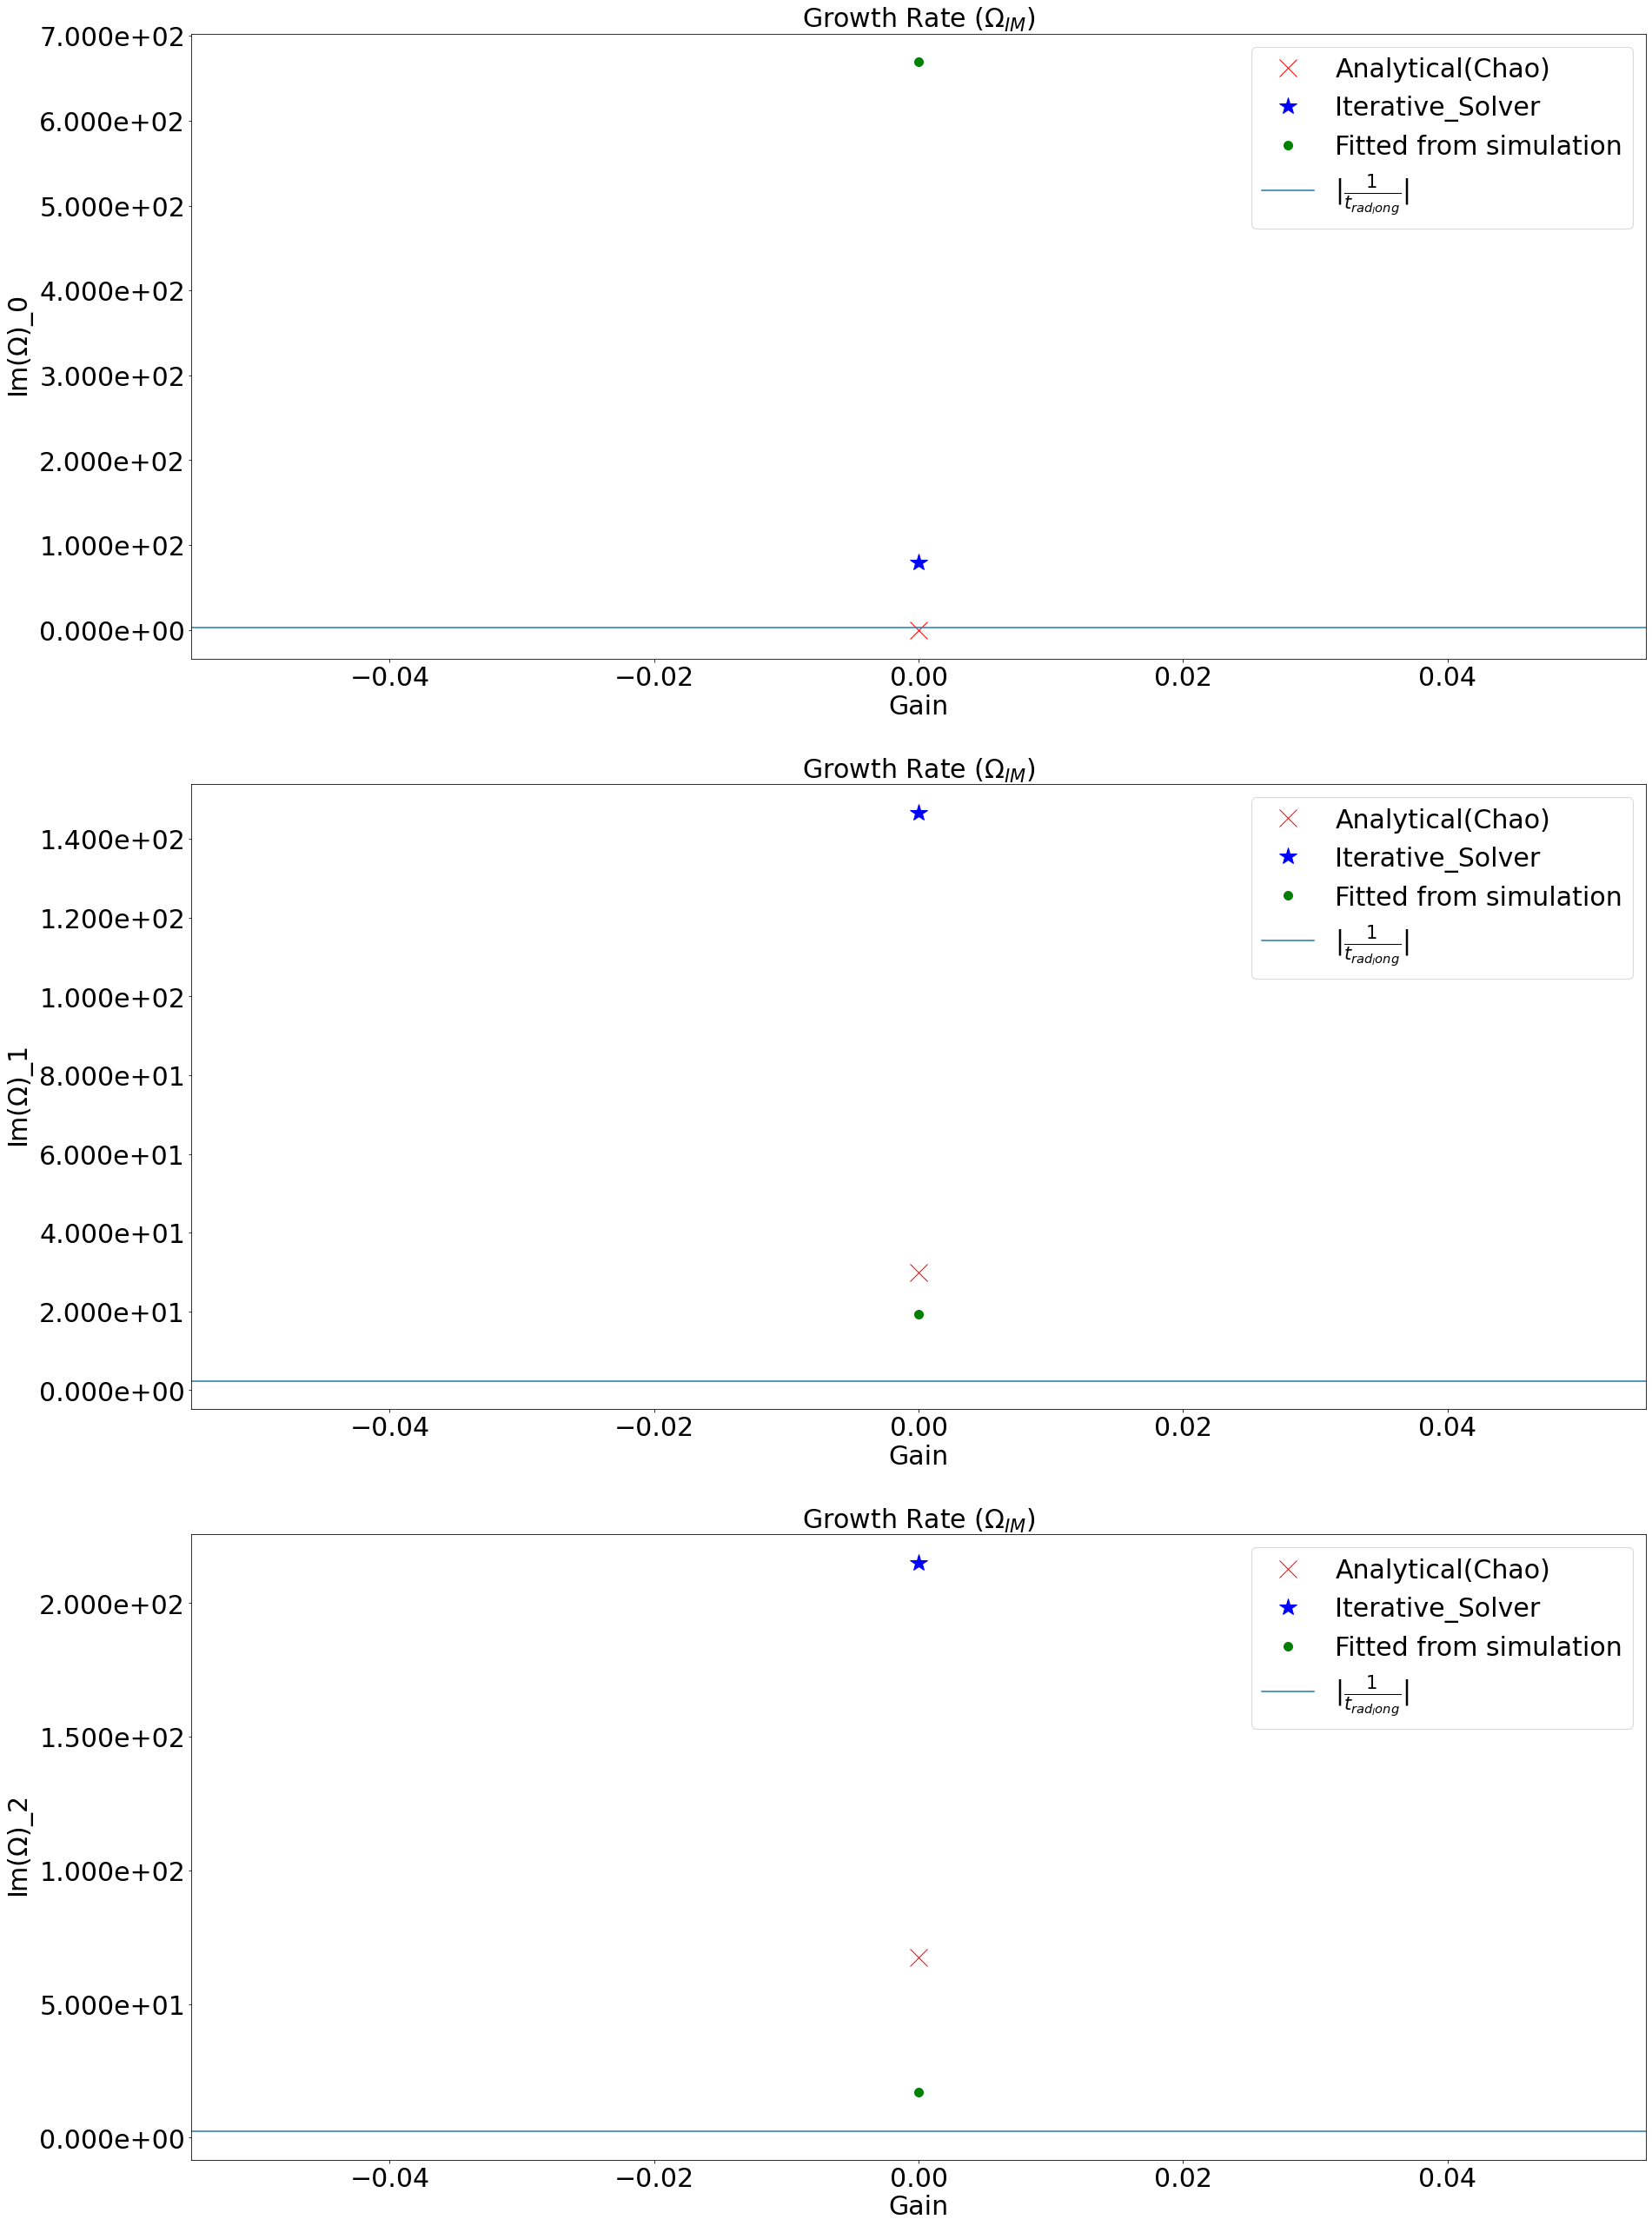

In [28]:
# plot the growth rate vs gain,exclude t_rad_long
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = 10#N_samp_disp#len(gain)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(15*(N_mode))
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(gain[rng1:rng2],delta_omega_Im[mu][rng1:rng2],'rx', ms = 20)
    axes1[mu].plot(gain[rng1:rng2],delta_omega_Im_Iter[mu][rng1:rng2],'b*', ms = 20)
    axes1[mu].plot(gain[rng1:rng2],qs[mu][rng1:rng2]/T0+1/t_rad_long,'g.', ms = 20)
    #axes1[0].set_ylim([-10,10])
    #axes1[mu].axhline(y = 0)
    axes1[mu].axhline(y = 1/t_rad_long)
    axes1[mu].set_title('Growth Rate ($\Omega_{IM}$)',fontsize=30)
    axes1[mu].set_ylabel(r'Im($\Omega$)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('Gain',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)", "Iterative_Solver","Fitted from simulation",r'$|\frac{1}{t_{rad_long}}|$'],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3e'))
print(cwd)
fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter_vs_gain.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
# plot the growth Time vs thetaL
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(thetaL[rng1:rng2],1/(delta_omega_Im[mu][rng1:rng2]-1/t_rad_long),'rx', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],1/(delta_omega_Im_Iter[mu][rng1:rng2]-1/t_rad_long),'b*', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],1/(qs[mu][rng1:rng2]/T0),'g.', ms = 20)
    #axes1[0].set_ylim([-4e-4,4e-4])
    axes1[mu].set_title('Growth time (include effect of t_rad_long)',fontsize=30)
    axes1[mu].set_ylabel('tau [s]_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('ThetaL [degree]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)", "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3e'))

fn_growth_rate = os.path.join(cwd,'growth_rate_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
# plot the growth rate vs Ib
os.chdir(home1)
cwd = os.getcwd()
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
rng1 = 0
rng2 = 50
for mu in mus:
    axes1[mu].plot(current[rng1:rng2],delta_omega_Im[mu][rng1:rng2]-1/t_rad_long,'rx-')
    axes1[mu].plot(current[rng1:rng2],delta_omega_Im_Iter[mu][rng1:rng2]-1/t_rad_long,'b*-')
    axes1[mu].plot(current[rng1:rng2],qs[mu][rng1:rng2]/T0,'g.-', ms = 20)
    
    #axes1[0].set_ylim([-100,10])
    axes1[mu].axhline(y=0)

    axes1[mu].set_title('Growth rate.',fontsize=30)
    axes1[mu].set_ylabel('Im(Q)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)", "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    #axes1.set_ylim([-0.001,0.001])
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5f'))

fn_growth_rate = os.path.join(cwd,'growth_rate.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
# plot the growth Time vs Ib
os.chdir(home1)
cwd = os.getcwd()
#current = [float(folder[21:25]) for folder in folders]
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
rng1 = 0
rng2 = 50
for mu in mus:
    axes1[mu].plot(current[rng1:rng2],1/(delta_omega_Im[mu][rng1:rng2]),'rx', ms = 20)
    axes1[mu].plot(current[rng1:rng2],1/(delta_omega_Im_Iter[mu][rng1:rng2]),'b*', ms = 20)
    axes1[mu].plot(current[rng1:rng2],1/(qs[mu][rng1:rng2]/T0+1/t_rad_long),'g.', ms = 20)
    axes1[mu].axhline(y=0)
    #axes1[0].set_ylim([0,0.006])
    axes1[mu].set_title('Growth time.',fontsize=30)
    axes1[mu].set_ylabel('tau_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)","Fitted from simulation", "Iterative_Solver"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    #axes1.set_ylim([-0.001,0.001])
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5e'))

fn_growth_rate = os.path.join(cwd,'growth_time.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()
os.chdir(home0)

In [ ]:
# plot the growth rate vs gain
os.chdir(home1)
cwd = os.getcwd()
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
rng1 = 0
rng2 = 50
for mu in mus:
    axes1[mu].plot(gain[rng1:rng2],delta_omega_Im[mu][rng1:rng2]-1/t_rad_long,'rx-')
    axes1[mu].plot(gain[rng1:rng2],delta_omega_Im_Iter[mu][rng1:rng2]-1/t_rad_long,'b*-')
    axes1[mu].plot(gain[rng1:rng2],qs[mu][rng1:rng2]/T0,'g.-', ms = 20)
    #axes1[0].set_ylim([-100,10])
    axes1[mu].axhline(y=0)

    axes1[mu].set_title('Growth rate.',fontsize=30)
    axes1[mu].set_ylabel('Im(Q)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('Gain',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)","Fitted from simulation", "Iterative_Solver"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    #axes1.set_ylim([-0.001,0.001])
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.5e'))

fn_growth_rate = os.path.join(cwd,'growth_rate_vs_gain.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
# Plot Centroids, cm
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]

inputfn = 'input.txt'
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1 = []
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_1.append(M1_all[i*nBunch*2+j])
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 4005
    rng1 = turns*nBunch
    rng2 = rng1+nBunch*1
    
    axes1.plot(((np.array(M1_1[rng1:rng2]))-centroids)*clight*100,'rx-')
    axes1_2 = axes1.twinx()
    axes1_2.plot((np.array(M1_1[rng1:rng2])-centroids)*h[0]*f0*360,'r.')
    axes1_2.set_ylabel('phase [degree]',fontsize=30)
    
    axes1.set_ylabel('centroid (cm)',fontsize=30)
    axes1.set_xlabel('Bunch #',fontsize=30)
    axes1.tick_params(labelsize=30)
    axes1_2.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'Centroids_cm_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

In [ ]:
# Plot Centroids, ps
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]

inputfn = 'input.txt'
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_1 = []
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_1.append(M1_all[i*nBunch*2+j])
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 9999
    rng1 = turns*nBunch
    rng2 = rng1+nBunch*1
    
    axes1.plot(((np.array(M1_1[rng1:rng2]))-centroids)*1e12,'rx-')
    axes1_2 = axes1.twinx()
    axes1_2.plot((np.array(M1_1[rng1:rng2])-centroids)*h[0]*f0*360,'r.')
    axes1_2.set_ylabel('phase [degree]',fontsize=30)
    
    axes1.set_ylabel('centroid (ps)',fontsize=30)
    axes1.set_xlabel('Bunch #',fontsize=30)
    axes1.tick_params(labelsize=30)
    axes1_2.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'Centroids_ps_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

In [ ]:
nTurns = int(tempinput['n_turns'][0])
nBunch = int(tempinput['n_bunches'][0])

M1_2_all = np.ndarray([len(new_folders),nBunch*nTurns])
ifold = 0
for folder in new_folders[:]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_2 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    print(len(M1_2))
    M1_2_all[ifold] = M1_2
    ifold+=1
os.chdir(home0)

In [ ]:
# Plot Centroids d_gamma
def find_idx(data,nBunch,threshold):
    print(np.max(data))
    idx = np.array(np.where(np.abs(data)>threshold)[0])
    
    if len(idx)>0:
        
        return int(idx[0]/nBunch)
    else:
        return int(len(data)/nBunch)
fs = omegas/2/pi
ifold = 0
for folder in new_folders[ifold:]:
    print(folder)
    rng1 = 3000*nBunch
    nturn = find_idx(M1_2_all[ifold],nBunch,50)
    print(nturn)
    rng2 = nturn*nBunch
    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    
    axes1.plot(M1_2_all[ifold][rng1:rng2],'rx-')
    
    axes1.tick_params(labelsize=30)
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
def smooth(data,n):
    data_temp = np.zeros(len(data))*1j
    step = int(n/2)
    data_temp[:step+1] = data[:step+1]
    for i in range(n):
        data_temp[step:len(data)-step] += data[i:len(data)-n+i+1]
    return data_temp/n

# Plot fft Centroids mode mu=0 d_gamma
df_real_fit_0 = []
fs = omegas/2/pi
ifold = 0
mu=0
expo0 = np.array([np.exp(1j*i*2*pi*mu/(nBunch+nGap)) for i in range(nBunch)])
for folder in new_folders[7:8]:
    print(folder)
    start_t = 3000
    rng1 = start_t*nBunch
    end_t = find_idx(M1_2_all[ifold],nBunch,50)
    print("end_t= ",end_t)
    rng2 = end_t*nBunch
    A0 = np.zeros(end_t-start_t)
    
    for i in range(start_t,end_t):
        A0[i-start_t] = np.sum(M1_2_all[ifold][i*nBunch:(i+1)*nBunch]*expo0)/nBunch
    
    a = np.fft.fft(A0-np.mean(A0))
    c = smooth((a),1)

    n = len(a)
    print(n)
    stepsize =T0#1/630.0
    b = np.fft.fftfreq(n,d=stepsize)
    f_step = 1/n/stepsize
    print("Frequency Step = ",f_step)
    fig1,axes1 = plt.subplots(2,1)
    fig1.set_figheight(20)
    fig1.set_figwidth(30)
    
    rg1 = int(0*fs/f_step)
    rg2 = int(5*fs/f_step)
    rg3 = int(0.5*fs/f_step)
    peaks, _ = find_peaks(np.abs(c[rg1:rg3]))
    
    print("frequency of peak ",b[peaks+rg1])
    if len(peaks)==0:
        df_real_fit_0.append(b[0+rg1]-omegas/2/pi)
    else:
        df_real_fit_0.append(b[peaks[-1]+rg1]-omegas/2/pi)
    #axes1.plot(b[rg1:rg2]/fs,(np.abs(a[rg1:rg2])),'rx-')
    #axes1.plot(b[rg1:rg2]/fs,np.log10(c[rg1:rg2]),'g.-')
    axes1[0].plot(np.real(A0[:]))
    axes1[1].plot(b[rg1:rg2]/fs,np.abs((c[rg1:rg2])),'g.-')
    #axes1[1].plot(b[rg1:rg2]/fs,c[rg1:rg2],'g.-')
    axes1[1].plot(b[rg1+peaks]/fs,np.abs((c[rg1+peaks])),'bx',ms=30)
    for ifx in range(1):
        axes1[1].axvline(x = 1+ifx*0.5,color='g')
    axes1[1].set_xlabel(r'$\frac{f}{fs}$',fontsize = 30)
    #axes1[1].set_title("df = "+"{0:0.2f}".format(df_real_fit[-1])+" [Hz] vs fs= {0:0.2f} [Hz]".format(omegas/2/pi),fontsize=30)
    #axes1.set_ylim([0,4])
    axes1[0].tick_params(labelsize=30)
    axes1[1].tick_params(labelsize=30)
    
    fn_after = os.path.join(cwd,'FFT'+folder+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
df_real_fit_0

In [ ]:
def smooth(data,n):
    data_temp = np.zeros(len(data))
    step = int(n/2)
    data_temp[:step+1] = data[:step+1]
    for i in range(n):
        data_temp[step:len(data)-step] += data[i:len(data)-n+i+1]
    return data_temp/n

# Plot fft Centroids mode mu=1 d_gamma
df_real_fit_1 = []
fs = omegas/2/pi
ifold = 0
mu=1
expo0 = np.array([np.exp(1j*i*2*pi*mu/(nBunch+nGap)) for i in range(nBunch)])
for folder in new_folders[ifold:]:
    print(folder)
    start_t = 3000
    rng1 = start_t*nBunch
    end_t = find_idx(M1_2_all[ifold],nBunch,40)
    rng2 = end_t*nBunch
    A0 = np.zeros(end_t-start_t)
    
    for i in range(start_t,end_t):
        A0[i-start_t] = np.sum(M1_2_all[ifold][i*nBunch:(i+1)*nBunch]*expo0)/nBunch
    
    a = np.fft.fft(A0)
    c = smooth(np.abs(a),1)

    n = len(a)
    print(n)
    stepsize =T0#1/630.0
    b = np.fft.fftfreq(n,d=stepsize)
    f_step = 1/n/stepsize
    print("Frequency Step = ",f_step)
    fig1,axes1 = plt.subplots(2,1)
    fig1.set_figheight(20)
    fig1.set_figwidth(30)
    
    rg1 = int(0*fs/f_step)
    rg2 = int(5*fs/f_step)
    rg3 = int(1.5*fs/f_step)
    peaks, _ = find_peaks(c[rg1:rg3], height=800,distance=300)
    
    print("frequency of peak ",b[peaks+rg1])
    if len(peaks)==0:
        df_real_fit_1.append(b[0+rg1]-omegas/2/pi)
    else:
        df_real_fit_1.append(b[peaks[-1]+rg1]-omegas/2/pi)
    #axes1.plot(b[rg1:rg2]/fs,(np.abs(a[rg1:rg2])),'rx-')
    #axes1.plot(b[rg1:rg2]/fs,np.log10(c[rg1:rg2]),'g.-')
    axes1[0].plot(np.real(A0[:]))
    axes1[1].plot(b[rg1:rg2]/fs,np.log10(c[rg1:rg2]),'g.-')
    axes1[1].plot(b[rg1+peaks]/fs,np.log10(c[rg1+peaks]),'bx',ms=30)
    for ifx in range(1):
        axes1[1].axvline(x = 1+ifx*0.5,color='g')
    axes1[1].set_xlabel(r'$\frac{f}{fs}$',fontsize = 30)
    #axes1[1].set_title("df = "+"{0:0.2f}".format(df_real_fit[-1])+" [Hz] vs fs= {0:0.2f} [Hz]".format(omegas/2/pi),fontsize=30)
    #axes1.set_ylim([0,4])
    
    axes1[0].tick_params(labelsize=30)
    
    axes1[1].tick_params(labelsize=30)
    
    fn_after = os.path.join(cwd,'FFT'+folder+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
df_real_fit_1

In [ ]:
def smooth(data,n):
    data_temp = np.zeros(len(data))
    step = int(n/2)
    data_temp[:step+1] = data[:step+1]
    for i in range(n):
        data_temp[step:len(data)-step] += data[i:len(data)-n+i+1]
    return data_temp/n

# Plot fft Centroids d_gamma
df_real_fit = []
fs = omegas/2/pi
ifold = 0
for folder in new_folders[ifold:]:
    print(folder)
    rng1 = 3000*nBunch
    nturn = find_idx(M1_2_all[ifold],nBunch,250)
    rng2 = nturn*nBunch
    a = np.fft.fft((M1_2_all[ifold][rng1:rng2]-1*np.mean(M1_2_all[ifold][rng1:rng2])))
    c = smooth(np.abs(a),1)

    n = len(a)
    stepsize =12*Trf[0]#1/630.0
    b = np.fft.fftfreq(n,d=stepsize)
    f_step = 1/n/stepsize
    print("Frequency Step = ",f_step)
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    rg1 = int(0*fs/f_step)
    rg2 = int(5*fs/f_step)
    rg3 = int(2*fs/f_step)
    peaks, _ = find_peaks(c[rg1:rg3], height=20,distance=10)
    
    print(b[peaks+rg1])
    if len(peaks)==0:
        df_real_fit.append(b[0+rg1]-omegas/2/pi)
    else:
        #df_real_fit.append(b[peaks[-1]+rg1]-omegas/2/pi)
        df_real_fit.append(b[peaks[np.argmax(c[peaks])]+rg1]-omegas/2/pi)
        
    print(c[peaks])
    print(peaks[np.argmax(c[peaks])])
    #axes1.plot(b[rg1:rg2]/fs,(np.abs(a[rg1:rg2])),'rx-')
    #axes1.plot(b[rg1:rg2]/fs,np.log10(c[rg1:rg2]),'g.-')
    axes1.plot(b[rg1:rg2]/fs,(c[rg1:rg2]),'g.-')

    #axes1.plot(b[rg1+peaks]/fs,np.log10(c[rg1+peaks]),'bx',ms=30)
    axes1.plot(b[rg1+peaks]/fs,(c[rg1+peaks]),'bx',ms=30)
    
    for ifx in range(1):
        axes1.axvline(x = 1+ifx*0.5,color='g')
    axes1.set_xlabel(r'$\frac{f}{fs}$',fontsize = 30)
    axes1.set_title("df = "+"{0:0.2f}".format(df_real_fit[-1])+" [Hz] vs fs= {0:0.2f} [Hz]".format(omegas/2/pi),fontsize=30)
    #axes1.set_ylim([0,4])
    
    axes1.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'FFT'+folder+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
df_real_fit

In [ ]:
delta_omega_Re/2/pi

In [ ]:
(delta_omega_Re_Iter-omegas)/2/pi

In [ ]:
# plot the frequency shift vs Ib
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(current)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    axes1[mu].plot(current[rng1:rng2],(delta_omega_Re[mu][rng1:rng2])/omegas,'rx', ms = 20)
    axes1[mu].plot(current[rng1:rng2],(delta_omega_Re_Iter[mu][rng1:rng2]-omegas)/omegas,'b*', ms = 20)
    axes1[0].plot(current[rng1:rng2],df_real_fit_0[rng1:rng2]/omegas*2*pi,'g.', ms = 20)
    axes1[1].plot(current[rng1:rng2],df_real_fit_1[rng1:rng2]/omegas*2*pi,'g.', ms = 20)
    axes1[mu].axhline(y=-1)
    #axes1[0].set_ylim([-10,2.5e4])
    #axes1[mu].set_title('Re(OMEGA/2pi)',fontsize=30)
    axes1[mu].set_ylabel(r'$\frac{df}{f_s}$',fontsize=50)
    axes1[mu].set_xlabel('IbDC [A]',fontsize=30)
    axes1[mu].legend([ "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    #axes1[mu].legend(["Linear Approx.", "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

fn_growth_rate = os.path.join(cwd,'f_shift_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
# Plot first d_gamma
fs = omegas/2/pi
ifold = 0
for folder in new_folders[ifold:]:
    print(folder)
    rng1 = 3000*nBunch+1
    nturn = 20
    rng2 = rng1+nturn*nBunch
    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    
    axes1.plot(M1_2_all[ifold][rng1:rng2:nBunch],'rx-')
    
    axes1.tick_params(labelsize=30)
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
# Plot fft of first d_gamma
df_real_fit = []
fs = omegas/2/pi
ifold = 0
for folder in new_folders[ifold:]:
    print(folder)
    rng1 = 3000*nBunch
    nturn = 200
    rng2 = rng1+nturn*nBunch
    a = np.fft.fft((M1_2_all[ifold][rng1:rng2:nBunch]-1*np.mean(M1_2_all[ifold][rng1:rng2:nBunch])))
    c = smooth(np.abs(a),1)

    n = len(a)
    stepsize =12*Trf[0]*nBunch#1/630.0
    b = np.fft.fftfreq(n,d=stepsize)
    f_step = 1/n/stepsize
    print("Frequency Step = ",f_step)
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    rg1 = 0
    rg2 = int(5*fs/f_step)
    rg3 = int(2*fs/f_step)
    peaks, _ = find_peaks(c[rg1:rg3], height=50,distance=300)
    
    print(b[peaks+rg1])
    if len(peaks)==0:
        df_real_fit.append(b[0+rg1]-omegas/2/pi)
    else:
        df_real_fit.append(b[peaks[-1]+rg1]-omegas/2/pi)

    #axes1.plot(b[rg1:rg2]/fs,(np.abs(a[rg1:rg2])),'rx-')
    axes1.plot(b[rg1:rg2]/fs,(c[rg1:rg2]),'g.-')
    axes1.plot(b[rg1+peaks]/fs,(c[rg1+peaks]),'bx',ms=30)
    
    for ifx in range(1):
        axes1.axvline(x = 1+ifx*0.5,color='g')
    axes1.set_xlabel(r'$\frac{f}{fs}$',fontsize = 30)
    axes1.set_title("df = "+"{0:0.2f}".format(df_real_fit[-1])+" [Hz] vs fs= {0:0.2f} [Hz]".format(omegas/2/pi),fontsize=30)
    #axes1.set_ylim([0,4])
    
    axes1.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'FFT_first'+folder+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
    ifold += 1
os.chdir(home0)

In [ ]:
df_mike

In [ ]:
Omegas_re_Mike

In [ ]:
# plot the frequency shift vs df
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(ddf)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    #axes1[mu].plot(ddf[rng1:rng2],(delta_omega_Re[mu][rng1:rng2])/omegas,'rx', ms = 20)
    axes1[mu].plot(ddf[rng1:rng2],(delta_omega_Re_Iter[mu][rng1:rng2]-omegas)/omegas,'b*', ms = 20)
    axes1[0].plot(df_mike,(Omegas_re_Mike-omegas)/omegas,'r.', ms = 20)
    
    axes1[0].plot(ddf[rng1:rng2],df_real_fit_0[rng1:rng2]/omegas*2*pi,'g.', ms = 20)
    
    axes1[1].plot(ddf[rng1:rng2],df_real_fit_1[rng1:rng2]/omegas*2*pi,'g.', ms = 20)
    
    #axes1[mu].axhline(y=0)
    #axes1[0].set_ylim([-10,2.5e4])
    #axes1[mu].set_title('Re(OMEGA/2pi)',fontsize=30)
    axes1[mu].set_ylabel(r'$\frac{df}{fs}$',fontsize=50)
    axes1[mu].set_xlabel('Detune (from opt. detune)[Hz]',fontsize=30)
    axes1[mu].legend(["Iterative_Solver_TX","Iterative_Solver_MMB","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

fn_growth_rate = os.path.join(cwd,'f_shift_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
fs

In [ ]:
# plot the frequency shift vs thetaL
os.chdir(home1)
cwd = os.getcwd()
rng1 = 0
rng2 = len(thetaL)
fig1,axes1 = plt.subplots(N_mode,1)
fig1.set_figheight(30)
fig1.set_figwidth(30)
for mu in mus:
    #axes1[mu].plot(thetaL[rng1:rng2],(delta_omega_Re[mu][rng1:rng2])/2/pi,'rx', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],(delta_omega_Re_Iter[mu][rng1:rng2]-omegas)/2/pi,'b*', ms = 20)
    axes1[mu].plot(thetaL[rng1:rng2],df_real_fit_0[rng1:rng2],'g.', ms = 20)
    #axes1[mu].axhline(y=0)
    #axes1[0].set_ylim([-10,2.5e4])
    axes1[mu].set_title('Growth Rate (Q_IM)',fontsize=30)
    axes1[mu].set_ylabel('Im(Q)_'+str(mu),fontsize=30)
    axes1[mu].set_xlabel('ThetaL [degree]',fontsize=30)
    axes1[mu].legend(["Analytical(Chao)", "Iterative_Solver","Fitted from simulation"],prop={'size': 30})
    axes1[mu].tick_params(labelsize=30)
    y_labels = axes1[mu].get_yticks()
    axes1[mu].yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.3e'))

fn_growth_rate = os.path.join(cwd,'f_shift_fit_analy_iter_vs_thetaL.jpg')
plt.savefig(fn_growth_rate,bbox_inches='tight')
plt.show()

In [ ]:
nModes = 2
fig,axi = plt.subplots(nModes+1,1)
fig.set_figheight(10*nModes)
fig.set_figwidth(30)
tot_turn = np.array([i for i in range(nTurns)])
amp_1 = np.ndarray((nModes,nTurns))
for mu in range(nModes):
    for turn in range(nTurns):
        test = np.zeros(nBunch)
        test[:nBunch] = M1_2[turn*nBunch:(turn+1)*nBunch]
        test = np.fft.fft(test)/nBunch*2
        amp_1[mu][turn] = np.abs(test[-mu])
    rng1 = 3000
    rng2 = rng1+250
    axi[mu].plot(tot_turn[rng1:rng2],np.abs(amp_1[mu][rng1:rng2]),'gx-')
    axi[mu].plot(tot_turn[rng1:rng2],np.abs(c[mu][rng1:rng2]),'rx-')
    
    axi[mu].set_ylabel('mode'+str(mu))
plt.show()

In [ ]:
# 1RF analytical case
RoQ = 500
NC = 1
harm = 5040
f0 = 78e3
f = harm*f0
eta = 0.00133198
Ek = 10e9
Pbeam = 10e6
IbDC = 2.5
Ib = IbDC*2
Qs_need = 0.05

Vs = Pbeam/IbDC
Vq = Qs_need**2*2*pi*Ek/(harm*eta)
Vc = np.sqrt(Vs**2+Vq**2)
QL = (Vs**2+Vq**2)/(RoQ*2*Pbeam)

R = RoQ*NC*QL
I0 = Vc/R
cosPhis = Vs/np.sqrt(Vs**2+Vq**2)
sinPhis = Vq/np.sqrt(Vs**2+Vq**2)
df = IbDC*RoQ*sinPhis*f/Vc
Y_load = Ib/I0
print("Vq = ",Vq/1e6,"[MV]")
print("Vs = ",Vs/1e6,"[MV]")
print("df = ",df)
print("QL = ",QL)
print("Qs_need = ",Qs_need)
print("Vc = ", Vc/1e6,"[MV]")
print("R = ",R/1e6,"MOhm")
print("IbDC = ",IbDC)
print("I0 = ",I0)
print("Y = ",Y_load)

In [ ]:
n_samp = 1000
phi_start = -2
phi_end = -88
Phi_detune = np.array([phi_start+(phi_end-phi_start)/n_samp*i for i in range(n_samp)])
df_detune = np.tan(Phi_detune/180*pi)*f/QL/2
Y = -2/np.sin(2*Phi_detune/180*pi)
Y_opt = -np.tan(Phi_detune/180*pi)/sinPhis
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(10)
fig1.set_figwidth(10)

axes1.plot(df_detune,Y)
axes1.plot(df_detune,Y_opt)

axes1.axhline(y=2)
axes1.axhline(y=Y_load)
axes1.axvline(x = -df)
axes1.set_ylim([0,10])
axes1.set_xlim([-40000,100])
plt.show()

In [ ]:
n_samp = 1000
phi_start = -2
phi_end = -88
Phi_detune = np.array([phi_start+(phi_end-phi_start)/n_samp*i for i in range(n_samp)])
df_detune = np.tan(Phi_detune/180*pi)*f/QL/2
Y = -2/np.sin(2*Phi_detune/180*pi)
Y_opt = -np.tan(Phi_detune/180*pi)/sinPhis
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(10)
fig1.set_figwidth(10)

axes1.plot(Phi_detune,Y)
axes1.plot(Phi_detune,Y_opt)
#axes1.axhline(y=2)
axes1.axhline(y=Y_load)
#axes1.axvline(x = -df)
axes1.set_ylim([0,10])

axes1.set_ylabel(r'$Y = \frac{I_b}{I_0}$',fontsize=30)
axes1.set_xlabel('$\Psi$ ($\degree$)',fontsize=30)
plt.show()

In [ ]:
# 2RF case
def Tan_phi_tot(Vbr1,Vbr2,phi1,phi2):
    return (-Vbr1*np.cos(phi1)*np.sin(phi1)-Vbr2*np.cos(phi2)*np.sin(phi2))/(-Vbr1*np.cos(phi1)**2-Vbr2*np.cos(phi2)**2)
def Eff_df(thetaLIn1, thetaLIn2,eff1,output):
    RoQ = np.array([37,37])
    NC = np.array([12,6])
    harm = np.array([7560,7560])
    f0 = 78e3
    f = harm*f0
    eta = 0.00133198
    Ek = 10e9
    Pbeam = 9.72e6
    IbDC = 2.5
    Ib = IbDC*2
    Qs_need = 0.069#harm[0]*1.2e-2*eta/2#0.05

    # these are the combined values from two RF
    Vs_need = Pbeam/IbDC
    Vq_need = Qs_need**2*2*pi*Ek/(harm[0]*eta)
    Vc_need = np.sqrt(Vs_need**2+Vq_need**2)
    QL = 3e4#Vc_need**2/(RoQ*2*Pbeam)
    psi_need = 0

    # these are the individual values for each type
    Vs = np.array([0,0])
    Vq = np.array([0,0])
    Vc = np.array([0,0])
    thetaL = np.array([thetaLIn1,thetaLIn2])/180*pi
    QL = np.array([0,0])
    Phis = np.array([0,0])
    psi = np.array([0,0])

    # The values of these two cavities need to satisfy two conditions:
    # 1. the beam power need to be replenished 
    # 2. the bucket height need to be held.
    # Vs1+Vs2 = Vs_need
    # Vq1+Vq2 = Vq_need
    # we can add symetric requirement (maybe not necessary)
    # Vs1/N1 = Vs2/N2
    # Vq1/N1 = -Vq2/N2

    Vs[0] = NC[0]/(NC[0]+NC[1])*Vs_need
    Vq[0] = NC[0]/(NC[0]-NC[1])*Vq_need
    Vs[1] = Vs[0]*NC[1]/NC[0]
    Vq[1] = -Vq[0]*NC[1]/NC[0]
    Vc = np.sqrt(Vs**2+Vq**2)

    Phis = np.arcsin(Vq/Vc) # synchronous phase

    # RoQ is effectively reduced by more stored energy
    RoQ_eff = np.sum(RoQ*NC)/(np.sum((Vs**2+Vq**2))/(Vs_need**2+Vq_need**2))
    # QL is increased because of the increased stored energy
    QL = (Vc/NC)**2/(2*RoQ*Pbeam/np.sum(NC))

    R = RoQ*QL*NC # impedance of each type of cavity

    Vbr = Ib*R

    Vgr = Vc/np.cos(thetaL)*(1+Vbr/Vc*np.cos(Phis))
    
    psi = np.arctan(-(Vbr*np.sin(Phis)/Vc+Vgr/Vc*np.sin(thetaL))) # detune

    Vbs = -Vbr*np.cos(psi)*np.cos(psi)
    Vbq = -Vbr*np.cos(psi)*np.sin(psi)

    Vgs = Vgr*np.cos(psi)*np.cos(Phis+thetaL+psi)
    Vgq = Vgr*np.cos(psi)*np.sin(Phis+thetaL+psi)

    R_eff = RoQ_eff*QL[0]
    I0_eff = Vc_need/R_eff
    df = np.tan(psi)*f/2/QL#-IbDC*RoQ*NC*np.sin(Phis)*f/Vc
    df_eff = -IbDC*RoQ_eff*Vq_need/Vc_need*f[0]/Vc_need

    df_eff2 = Tan_phi_tot(Vbr[0],Vbr[1],psi[0],psi[1])*f[0]/(2*QL[0])
    Y_load = Ib/I0_eff
    if output == 1:
        print("Vb:  ",Vbs,',',Vbq)
        print("Vg:  ",Vgs,',',Vgq)
        print("Vc:  ",Vs,',',Vq)
        print("Error of combination : ",Vbs+Vgs-Vs, ',',Vbq+Vgq-Vq)
        print("Vq_need = ",Vq_need/1e6,"[MV]")
        print("Vs_need = ",Vs_need/1e6,"[MV]")
        print("Vc_need = ", Vc_need/1e6,"[MV]")

        print("Vq = ",Vq/1e6,"[MV]")
        print("Vs = ",Vs/1e6,"[MV]")
        print("Phis = ",Phis/pi*180)
        print("psi = ",psi/pi*180)
        print("df = ",df)
        print("df_eff = ",df_eff)
        print("df_eff2 = ",df_eff2)

        print("QL = ",QL)
        print("Qs_need = ",Qs_need)

        print("RoQ_eff = ",RoQ_eff, "[Ohm]")
        print("R_eff = ",R_eff/1e6,"[MOhm]")
        print("IbDC = ",IbDC)
        print("I0_eff = ",I0_eff)
        print("Y = ",Y_load)
    if eff1==1:
        return df_eff
    else:
        return df_eff2
    

In [ ]:
thetaLMin = -89
thetaLMax = 89
n_thetaL = 300
dthetaL = (thetaLMax-thetaLMin)/n_thetaL

thetaL = np.array([thetaLMin+dthetaL*i for i in range(n_thetaL)])

df_eff = np.ndarray((n_thetaL,n_thetaL))
df_eff1 = Eff_df(thetaLMin+dthetaL*i,thetaLMin+dthetaL*j,1,0)

for i in range(n_thetaL):
    for j in range(n_thetaL):
        df_eff[i][j] = Eff_df(thetaLMin+dthetaL*i,thetaLMin+dthetaL*j,0,0)


In [ ]:
fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(10)
fig1.set_figwidth(10)
rng1 = 0
rng2 = 150
idx = np.array([i for i in range(n_thetaL)])
for i in idx[rng1:rng2]:
    axes1.plot(thetaL,df_eff[i])
axes1.axhline(y=df_eff1)
axes1.set_ylim([df_eff1-1000,df_eff1+1000])
axes1.set_xlim([-90,-75])
print("Ploting thetaL1 range : ",thetaLMin+rng1*dthetaL,'->',thetaLMin+rng2*dthetaL)
plt.show()

In [ ]:
Eff_df(-89,89,0,1)

In [ ]:
59.413966 /12

In [ ]:
n_samp = 1000
phi_start = -2
phi_end = -88
Phi_detune = np.array([phi_start+(phi_end-phi_start)/n_samp*i for i in range(n_samp)])
df_detune = np.tan(Phi_detune/180*pi)*f[0]/QL[0]/2
Y = -2/np.sin(2*Phi_detune/180*pi)

fig1,axes1 = plt.subplots(1,1)
fig1.set_figheight(10)
fig1.set_figwidth(10)

axes1.plot(df_detune,Y)
axes1.axhline(y=2)
axes1.axhline(y=Y_load)
axes1.axvline(x = df_eff, color = 'g')

axes1.axvline(x = df_eff2,color='r')
plt.show()

In [ ]:
df = np.array([-(i+1)*0.01 for i in range(100)])
f0 = 100000
f = f0*(1+df)
mus = 20
T = 1/f0/mus
f1 = (2*pi*f*T)**2-(2*pi*f0*T)**2
f2 = 2*np.cos(2*pi*f0*T)-2*np.cos(2*pi*f*T)

In [ ]:
fig,axi = plt.subplots(1,1)
fig.set_figheight(10)
fig.set_figwidth(20)
axi.tick_params(labelsize=30)
axi.set_xlabel("Relative frequency shift",fontsize=30)
axi.set_ylabel("Relative error",fontsize=30)
axi.set_title("Relative error between (wT)**2-(w0T)**2 and 2cos(w0T)-2cos(wT), nus=1/"+str(mus),fontsize=20)
axi.plot(df,(f1-f2)/f2)
plt.show()

In [ ]:
new_folders[7:8]

In [ ]:
# Dump Centroids d_gamma to ascii file
import csv

inputfn = 'input.txt'
for folder in new_folders[7:8]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
   
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M1_all = array('d')
    M1_fn = 'M1_all.bin'
    datafile = os.path.join(cwd,M1_fn)    
    with open(datafile, mode='rb') as file: # b is important -> binary
        M1_all.fromfile(file,2*nTurns*nBeam*nBunch)
    M1_2 = []
    
    for i in range(nTurns):
        for j in range(nBunch):
            M1_2.append(M1_all[i*nBunch*2+nBunch+j]-Gamma0)
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    
    turn_truncate = np.where(np.abs(M1_2)>200)[0][0]
    fn = 'M1_2.txt'
    with open(fn, mode='w') as fn_file:
        fn_writer = csv.writer(fn_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        fn_writer.writerow(["# of Turn","# of Bunch","dGamma"])
        for i in range(3000*nBunch,int(turn_truncate/nBunch)*nBunch):
            fn_writer.writerow([int(i/nBunch),i%nBunch,M1_2[i]])
        fn_file.close()
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 2999
    rng1 = turns*nBunch
    rng2 = turn_truncate#rng1+nBunch*2000
    
    axes1.plot((np.array(M1_2[rng1:rng2])),'r.')
    #axes1.axvline(x = nfill*nBunch)
    #axes1.axvline(x = (nfill+n_q_ramp)*nBunch)
    
    axes1.set_ylabel('centroid (d_gamma)',fontsize=30)
    axes1.set_xlabel('Bunch # x Turn #',fontsize=30)
    axes1.tick_params(labelsize=30)
    fn_after = os.path.join(cwd,'Centroids_gamma_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

In [ ]:
I = np.array([1.9,2.5,0.27])
nBunch = 630
f0 = 78e3
h = 7560
nMacro = I/nBunch/f0/1.6e-19
Prad = np.array([2.5e6,9.2e6,10e6])
Pgamma = Prad/nMacro/nBunch/1.6e-19
E = np.array([5e9,10e9,18e9])
alphaE = Pgamma/E
tauE = 1/alphaE

sigEoE_10 = 5.5e-4
gamma10 = 10e9/0.5e6
factor = sigEoE_10**2/gamma10**2

E = np.array([5e9,10e9,18e9])
gamma = E/0.5e6
sigEoE = np.sqrt(factor*gamma**2)
sigGamma = gamma*sigEoE
Qs = np.array([0.053,0.054,0.047])
gammaT = np.array([27.14,27.14,38.96])
eta = 1/gammaT**2
thetaHat = sigEoE/Qs*eta
sig_t = thetaHat/2/pi/f0
sig_z = sig_t*clight
print("gamma = ",gamma)
print("sig_gamma = ",sigGamma)


In [ ]:
# Plot lengthes
centroids = [(i*fill_step+0.5)*Trf[mainRF] for i in range(nBunch)]

for folder in new_folders[:1]:
    print(folder)
    os.chdir(os.path.join(home1,folder))
    cwd = os.getcwd()
    inputfile = os.path.join(cwd,inputfn)
    tempinput = {}
    with open(inputfile) as inputfile:
        for line in inputfile:
            if len(line.split())>1:
                tempinput[line.split()[0]] = line.split()[1:]
    for i in tempinput:
        for j in range(len(tempinput[i])):
            tempinput[i][j] = float(tempinput[i][j])
    
    nTurns = int(tempinput['n_turns'][0])
    
    nBunch = int(tempinput['n_bunches'][0])
    
    M2_all = array('d')
    M2_fn = 'M2_all.bin'
    datafile = os.path.join(cwd,M2_fn)    
    print("Tot data ",3*nTurns*nBeam*nBunch)
    with open(datafile, mode='rb') as file: # b is important -> binary
        M2_all.fromfile(file,3*nTurns*nBeam*nBunch)
    M2_1 = []
    M2_2 = []
    M2_3 = []
    for i in range(nTurns):
        for j in range(nBunch):
            M2_1.append(M2_all[i*nBunch*3+j])
            M2_2.append(M2_all[i*nBunch*3+nBunch+j])
            M2_3.append(M2_all[i*nBunch*3+nBunch*2+j])
    Emittance = np.sqrt(np.array(M2_1)*np.array(M2_2)-np.array(M2_3)**2)/Gamma0*Ek
    M2_1 = np.sqrt(np.array(M2_1))
    M2_2 = np.sqrt(np.array(M2_2))
    M2_3 = np.array(M2_3)
    
    turns = np.array([i for i in range(nTurns*nBeam*nBunch)])
    
    fig1,axes1 = plt.subplots(1,1)
    fig1.set_figheight(10)
    fig1.set_figwidth(30)
    
    turns = 59999
    rng1 = turns*nBunch
    rng2 = rng1+nBunch*1
    
    idx_stop = np.where(np.array(M2_1[:])*clight*1000>100)
    #print("first bad idx : ",idx_stop)
    if len(idx_stop[0])>0:
        rng2 = nBunch*int(idx_stop[0][0]/nBunch)
        print("rng2: ",rng2)
    else:
        print("2")
        #rng2 = rng1+nBunch*2000
        rng2 = rng1+nBunch*1
    rng2 = rng1+nBunch*1
    axes1.plot(np.array(M2_1[rng1:rng2])*clight*1000,'r.')
    #axes1[0].set_title("Plot at turn # "+str(turns),fontsize=30)
    axes1.set_ylabel('sig_length [mm]',fontsize=30)
    #axes1[0].set_xlabel('Bunch # x Turn #',fontsize=30)
    axes1.set_xlabel('Bunch # ',fontsize=30)
    axes1.tick_params(labelsize=30)
    
    
    fn_after = os.path.join(cwd,'Logitudinal_'+str(turns)+'_'+str((rng2-rng1)/nBunch)+'.jpg')
    plt.savefig(fn_after,bbox_inches='tight')
    plt.show()
os.chdir(home0)

In [ ]:
import numba
from numba import jit

In [ ]:
@jit(nopython=True)
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    # assuming square input matrix
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

In [ ]:
x = np.arange(100).reshape(10, 10)
go_fast(x)

In [ ]:
%timeit go_fast(x)

In [ ]:
np.testing.assert_array_equal(go_fast(x), go_fast.py_func(x))


In [ ]:
%timeit go_fast.py_func(x)


In [ ]:
def go_numpy(a):
    return a + np.tanh(np.diagonal(a)).sum()

In [ ]:
np.testing.assert_array_equal(go_numpy(x), go_fast(x))


In [ ]:
%timeit go_numpy(x)
